<a href="https://colab.research.google.com/github/sayak-coding/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>


<input type="image" src="https://thumbs.dreamstime.com/b/terrorism-word-written-ash-dust-dirt-as-awful-dangerous-f-grey-frightening-foreboding-concept-image-89157490.jpg" alt="Submit" style="float:right" class = "center" width="1300" height="900">




<!DOCTYPE html>
<html>
<body>

<h1><b><center>Insight</center></b></h1>

<ul>
  <li>Import Libraries</li>
  <li>Import the required CSV file</li>
  <li>Null values operation</li>
  <li>Top & least Terrorism Affected Countries, Region, State, Year, Month and Day</li>
  <li>How many Terrorist group present in our dataset</li>
  <li>Group Name vs. Activity Trend</li>
  <li>Attack Methods</li>
  <li>Target Type</li>
  <li>Country and Region wise attack, wheather it was successful or not</li>
  <li>Percentage of Total Killed vs. Total Wounded by weapon types, target types and attack types</li>
  <li>Killed vs. Wound in Iraq and Pakistan</li>
  <li>Terrorist group based on succes and failure</li>
  <li>Top 10 group based on Attack type and Weapon type</li>
  <li>Nationality of Terrorist</li>
  <li>Terror hotspots in the World</li>
  <li><b>**Terrorism In India**</b></li>
  <ul>
    <li>Top and least Terrorist affected region</li>
    <li>Terrorist activities over the years</li>
    <li>Activities of terrorist group over the years</li>
    <li>Target type in India</li>
    <li>Killed vs. Wounded in India</li>
    <li>State wise attack, wheather it was successful or not</li>
    <li>Percentage of Attack Types and Target Types</li>
  </ul>
</ul>

</body>
</html>



#Import Libraries

In [ ]:
pip install squarify


In [ ]:
pip install geopandas

In [ ]:
pip install geoplot

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpat
import squarify
import descartes
import geopandas as gpd
import geoplot
from shapely.geometry import Point, Polygon
import folium


In [5]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import the required CSV file 

In [6]:
global_terrorism = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project/Global Terrorism Analysis/Global Terrorism Data.csv',encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
# Showing top 10 row of the data set

global_terrorism.head(10).T

,0,1,2,3,4,5,6,7,8,9
eventid,197000000001,197000000002,197001000001,197001000002,197001000003,197001010002,197001020001,197001020002,197001020003,197001030001
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970
imonth,7,0,1,1,1,1,1,1,1,1
iday,2,0,0,0,0,1,2,2,2,3
approxdate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
INT_LOG,0,0,-9,-9,-9,-9,0,-9,0,0
INT_IDEO,0,1,-9,-9,-9,-9,0,-9,0,0
INT_MISC,0,1,1,1,1,0,0,0,0,0
INT_ANY,0,1,1,1,1,-9,0,-9,0,0


In [8]:
global_terrorism.info() # a quick information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
global_terrorism.shape # shape of our data set

(181691, 135)

In [10]:
pd.DataFrame(global_terrorism.dtypes) # data types of each row of our data set

,0
eventid,int64
iyear,int64
imonth,int64
iday,int64
approxdate,object
...,...
INT_LOG,int64
INT_IDEO,int64
INT_MISC,int64
INT_ANY,int64


# Null values operation 

In [11]:
pd.DataFrame(global_terrorism.isnull().sum()) # check for null values 

,0
eventid,0
iyear,0
imonth,0
iday,0
approxdate,172452
...,...
INT_LOG,0
INT_IDEO,0
INT_MISC,0
INT_ANY,0


In [12]:
global_terrorism.fillna(0, inplace = True) # dealing with the null values

In [13]:
pd.DataFrame(global_terrorism.isnull().sum()) # rechecking for the null values

,0
eventid,0
iyear,0
imonth,0
iday,0
approxdate,0
...,...
INT_LOG,0
INT_IDEO,0
INT_MISC,0
INT_ANY,0


In [14]:
pd.DataFrame(global_terrorism.columns.values.tolist()).T # showing only the columns name 

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [15]:
# Rename of the required column 

global_terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target','success':'Success','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [16]:
#There are too many unneccesary columns for this analysis. So we keep only those columns whichever we will required for our analysis

columns_to_keep = ['Year','Month','Day','Country','State','Region','latitude','longitude','Attack_Type','Success','Target','Killed','Wounded','Summary','Group','Target_type',
                   'Weapon_type','Motive']

global_terrorism = global_terrorism[columns_to_keep]

# Final Data Frame

In [17]:
# How our final data set looks like 

global_terrorism.head().T

,0,1,2,3,4
Year,1970,1970,1970,1970,1970
Month,7,0,1,1,1
Day,2,0,0,0,0
Country,Dominican Republic,Mexico,Philippines,Greece,Japan
State,0,Federal,Tarlac,Attica,Fukouka
Region,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia
latitude,18.456792,19.371887,15.478598,37.99749,33.580412
longitude,-69.951164,-99.086624,120.599741,23.762728,130.396361
Attack_Type,Assassination,Hostage Taking (Kidnapping),Assassination,Bombing/Explosion,Facility/Infrastructure Attack
Success,1,1,1,1,1


# Nationality of Terrorist ( Size is proportional to number of attacks)

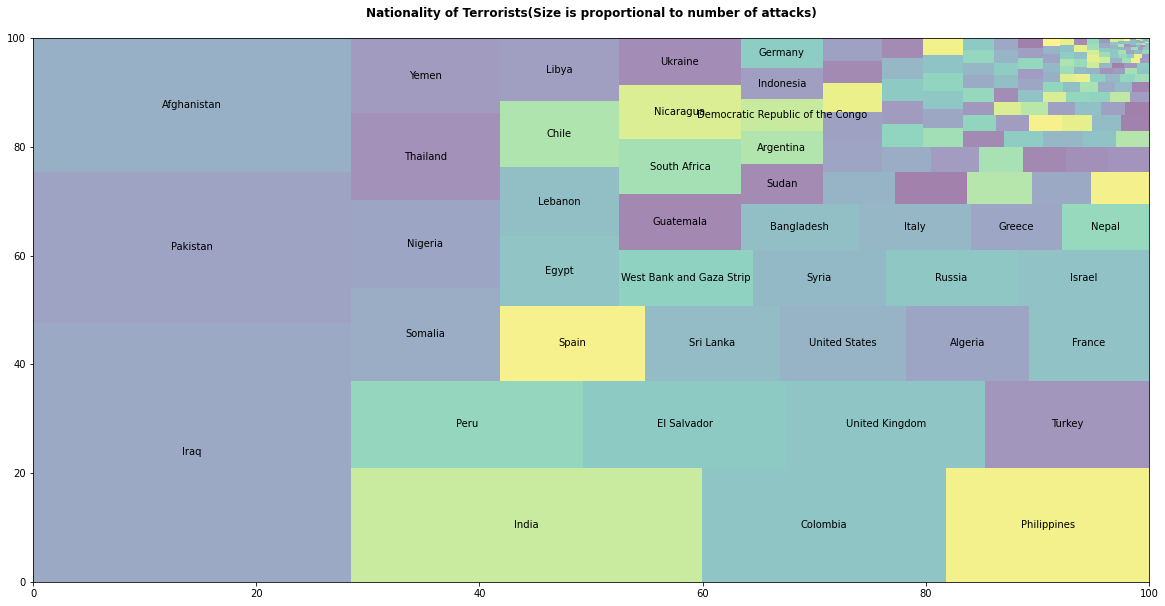

In [18]:
# Visualization 

plt.figure(figsize=(20,10))
squarify.plot(sizes=global_terrorism['Country'].value_counts().tolist(), label=global_terrorism['Country'].value_counts().index.tolist()[:40],alpha=0.5)
plt.title('Nationality of Terrorists(Size is proportional to number of attacks)\n', weight='bold')
plt.show()

# Top 10 Terrorism Affected Countries














In [19]:
global_terrorism.Country.value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

Text(0.5, 1.0, 'Top 10 Terrorism Affected Countries')

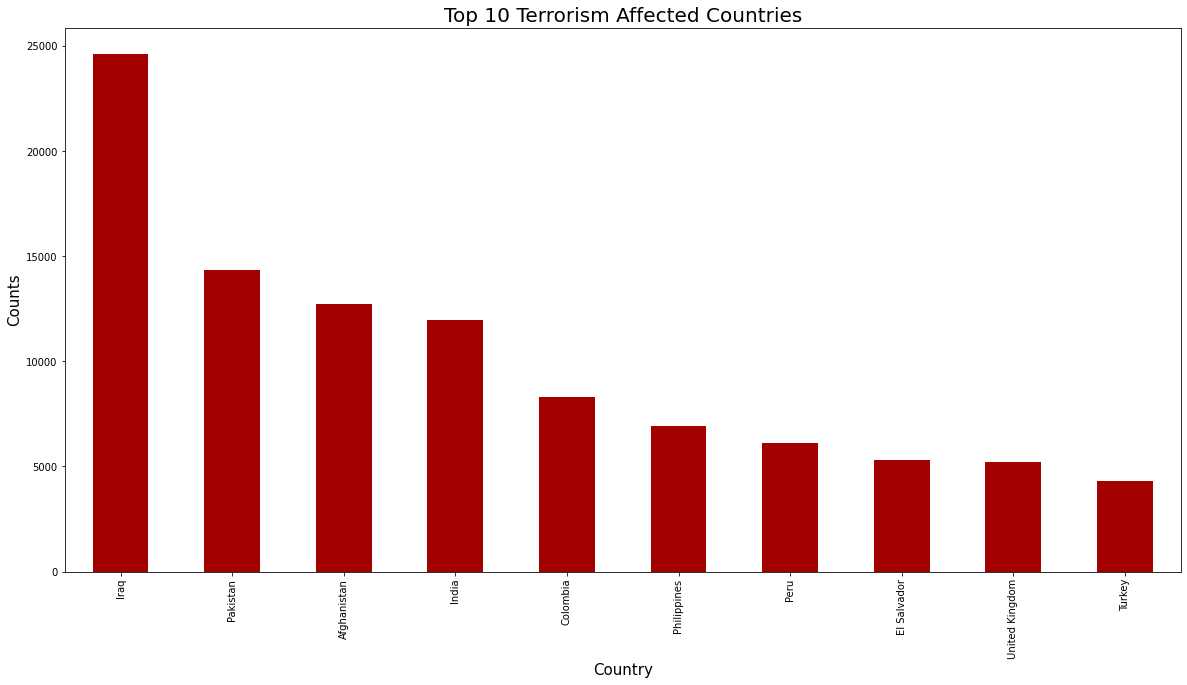

In [20]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Country'].value_counts().head(10).sort_values(ascending = False).plot(kind = 'bar',color = '#A30000')
ax1.set_xlabel('Country',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Top 10 Terrorism Affected Countries',size = 20)


<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The highest terrorist affected country is " Iraq", followed by " Pakistan" and "Afghanistan". "India" stay in 4th position.</h2>

</body>
</html>


# Least 20 Terrorism Affected Countries

In [21]:
global_terrorism.Country.value_counts().tail(20)

Dominica               3
French Polynesia       3
Barbados               3
Vanuatu                2
Turkmenistan           2
Seychelles             2
Mauritius              2
St. Kitts and Nevis    2
Equatorial Guinea      2
South Yemen            2
Vatican City           1
Falkland Islands       1
St. Lucia              1
North Korea            1
New Hebrides           1
International          1
Wallis and Futuna      1
South Vietnam          1
Andorra                1
Antigua and Barbuda    1
Name: Country, dtype: int64

Text(0.5, 1.0, 'Least 20 Terrorism Affected Countries')

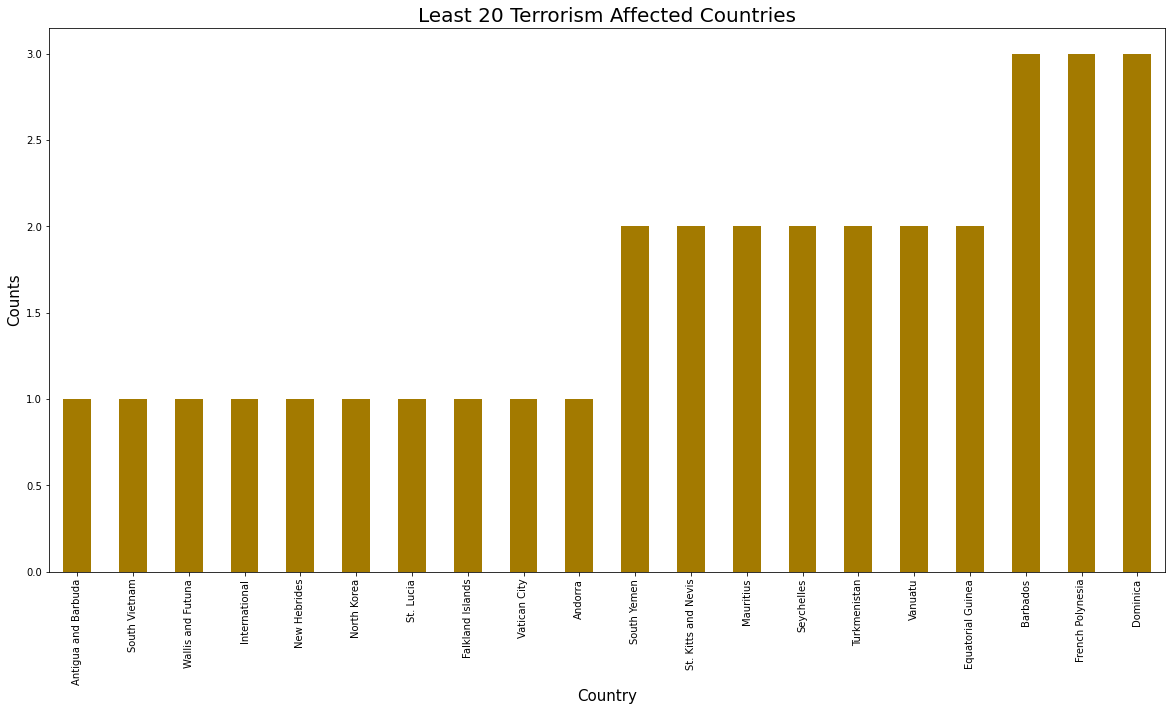

In [22]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Country'].value_counts().tail(20).sort_values(ascending = True).plot(kind = 'bar',color = '#A37A00')
ax1.set_xlabel('Country',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Least 20 Terrorism Affected Countries',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The least terrorist affected country is " Antigua and Barbuda", then "South Vietnam" and "Wallis and Futuna". </h2>

# Top 10 Terrorism Affected Region

In [23]:
global_terrorism.Region.value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

Text(0.5, 1.0, 'Top 10 Terrorism Affected Regions')

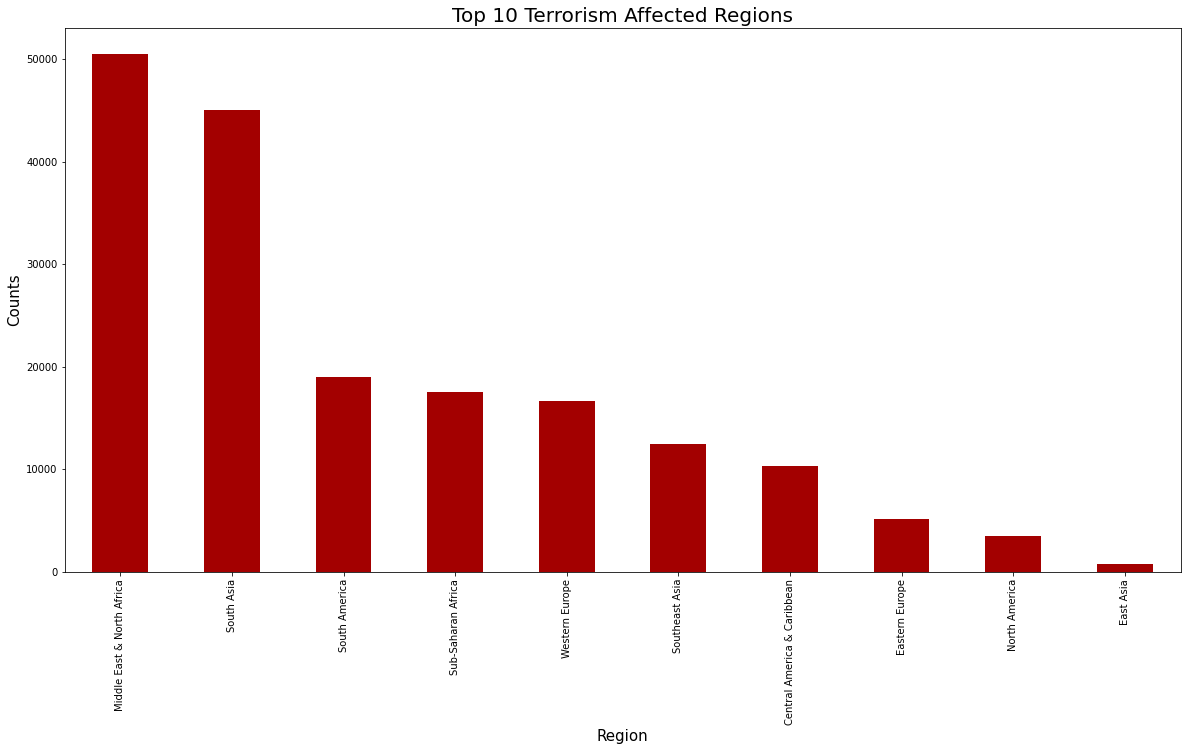

In [24]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Region'].value_counts().head(10).sort_values(ascending = False).plot(kind = 'bar',color = '#A30000')
ax1.set_xlabel('Region',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Top 10 Terrorism Affected Regions',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The highest terrorist affected region is " Middle east & North Africa" followed by  "South Asia" and "South America". </h2>

# Least 10 Terrorism Affected Region

In [25]:
global_terrorism.Region.value_counts().tail(10)

South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

Text(0.5, 1.0, 'Least 10 Terrorism Affected Regions')

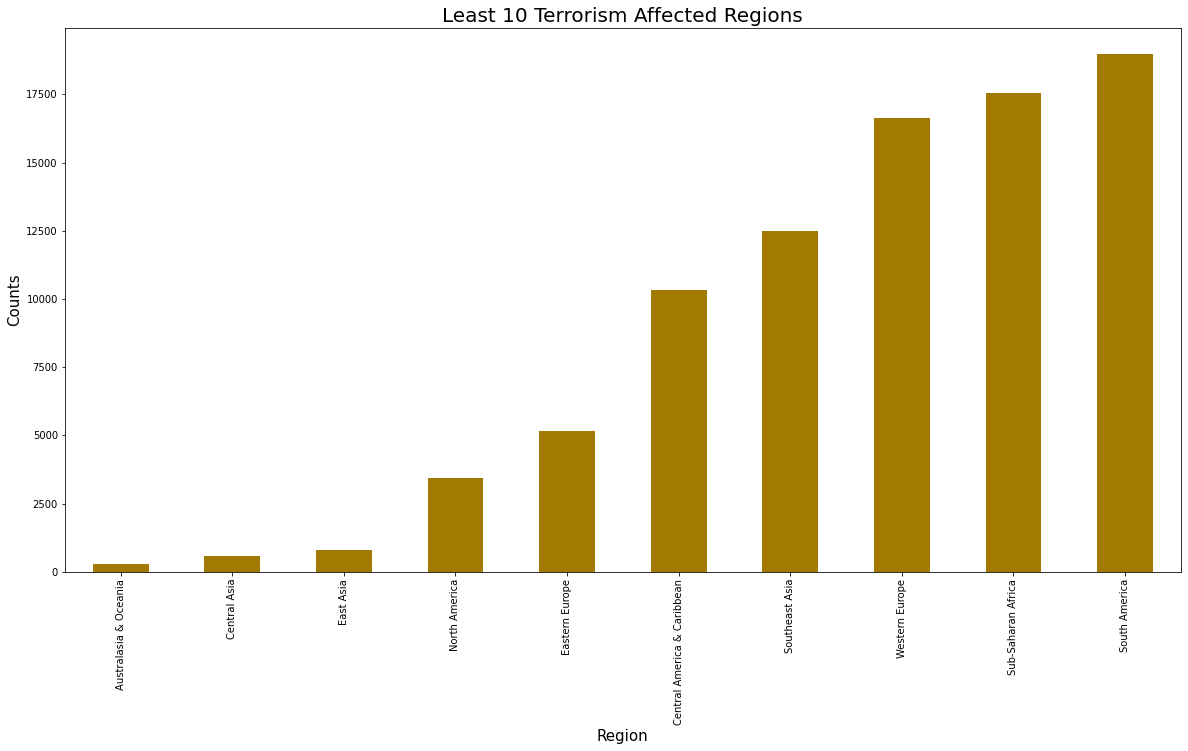

In [26]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Region'].value_counts().tail(10).sort_values(ascending = True).plot(kind = 'bar',color = '#A37A00')
ax1.set_xlabel('Region',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Least 10 Terrorism Affected Regions',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The least terrorist affected region is " Antigua and Barbuda", then "South Vietnam" and "Wallis and Futuna". </h2>

</body>
</html>

# Top 10 Terrorism Affected States

In [27]:
global_terrorism.State.value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

Text(0.5, 1.0, 'Top 10 Terrorism Affected States')

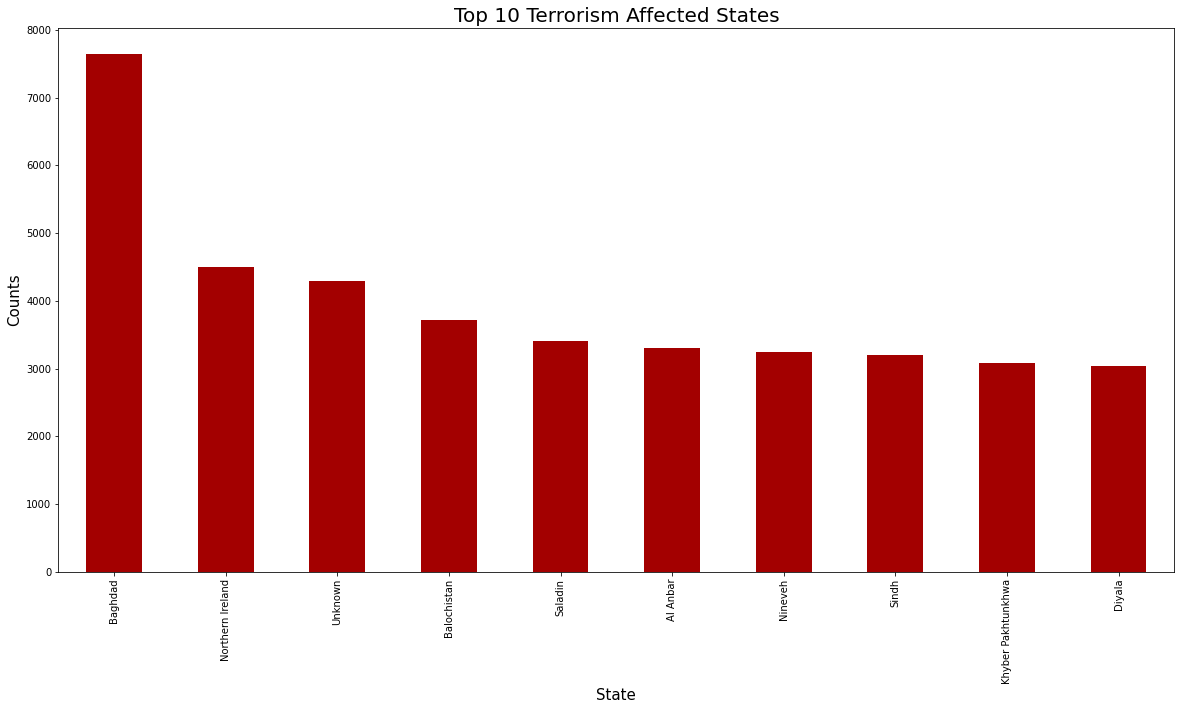

In [28]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['State'].value_counts().head(10).sort_values(ascending = False).plot(kind = 'bar',color = '#A30000')
ax1.set_xlabel('State',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Top 10 Terrorism Affected States',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The highest terrorist affected state is " Baghdad" followed by "Northern Ireland" </h2>

</body>
</html>

# Least 10 Terrorism Affected States

In [29]:
global_terrorism.State.value_counts().tail(10)

East Nusa Tenggara          1
Macuata                     1
Cakaudrove                  1
Smolensk Oblast             1
Mexican Federal District    1
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: State, dtype: int64

Text(0.5, 1.0, 'Least 10 Terrorism Affected States')

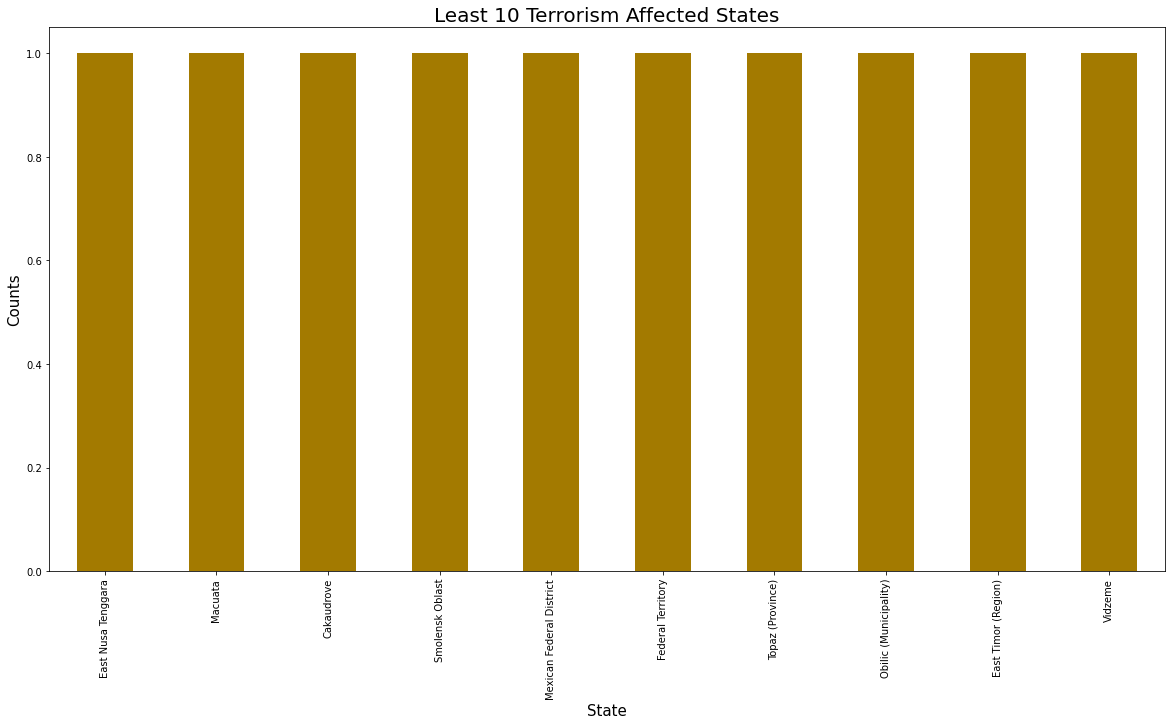

In [30]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['State'].value_counts().tail(10).sort_values(ascending = True).plot(kind = 'bar',color = '#A37A00')
ax1.set_xlabel('State',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Least 10 Terrorism Affected States',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The least terrorist affected states are  "East Nusa Tenggara","Macuata", "Cakaudrove", etc. </h2>

</body>
</html>

# Top 10 Terrorism Affected Year

In [31]:
global_terrorism.Year.value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

Text(0.5, 1.0, 'Top 10 Terrorism Affected Years')

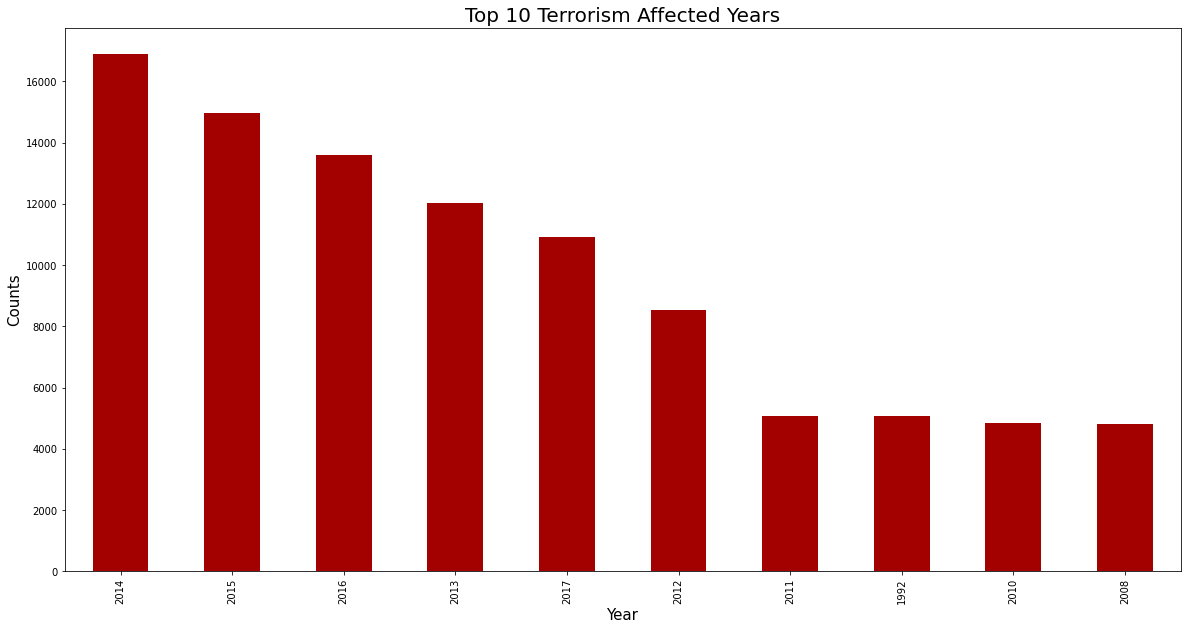

In [32]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Year'].value_counts().head(10).sort_values(ascending = False).plot(kind = 'bar',color = '#A30000')
ax1.set_xlabel('Year',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Top 10 Terrorism Affected Years',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The highest terrorist affected year is "2014" followed by "2015" and "2016". </h2>

</body>
</html>

# Least 10 Terrorism Affected Year

In [33]:
global_terrorism.Year.value_counts().tail(10)

2003    1278
2004    1166
1998     934
1976     923
1975     740
1970     651
1974     581
1972     568
1973     473
1971     471
Name: Year, dtype: int64

Text(0.5, 1.0, 'Least 10 Terrorism Affected Years')

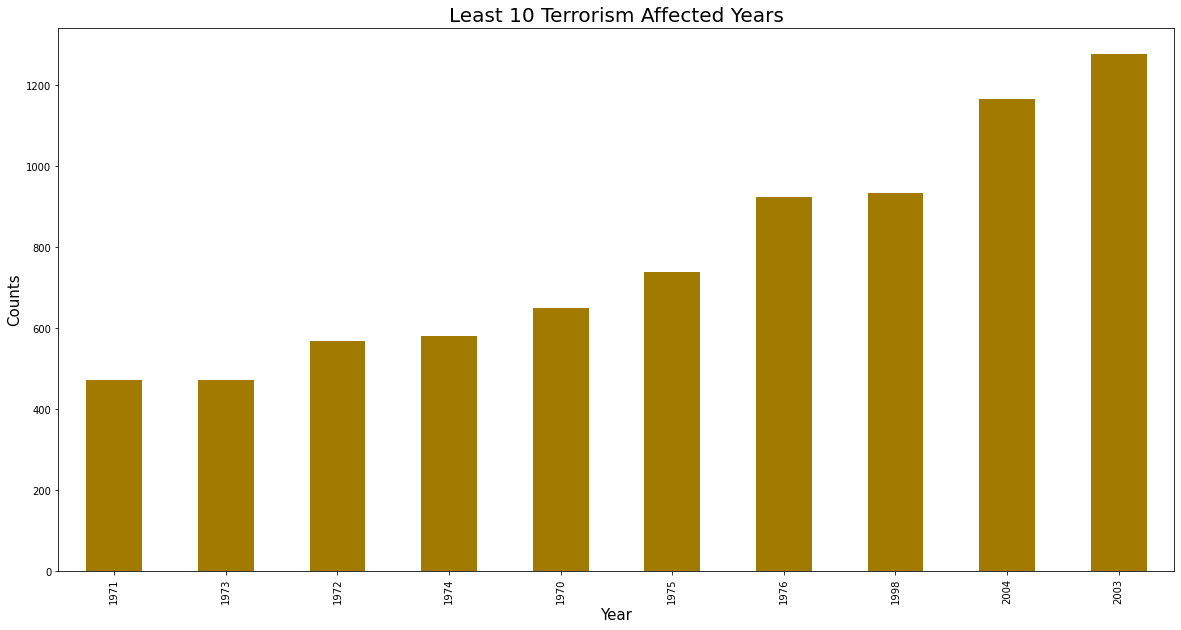

In [34]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Year'].value_counts().tail(10).sort_values(ascending = True).plot(kind = 'bar',color = '#A37A00')
ax1.set_xlabel('Year',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Least 10 Terrorism Affected Years',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The least terrorist affected state is " 1971" then, "1973" and "1972". </h2>

</body>
</html>

# Top 10 Terrorism Affected Month

In [35]:
global_terrorism.Month.value_counts().head(10)

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
Name: Month, dtype: int64

Text(0.5, 1.0, 'Top 10 Terrorism Affected Months')

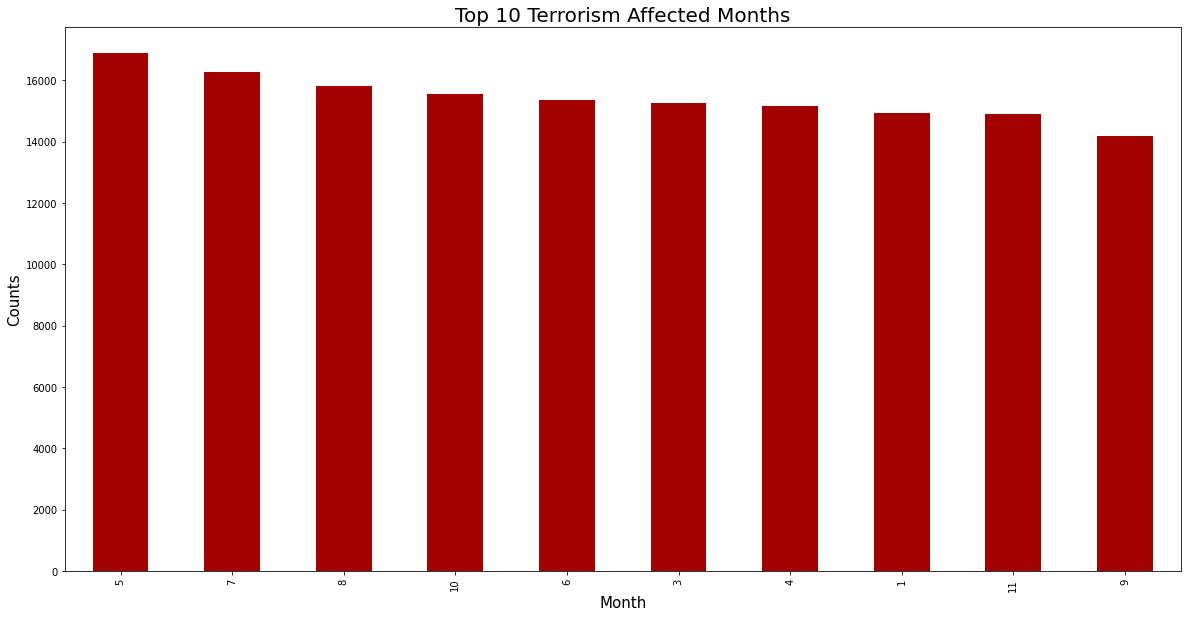

In [36]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Month'].value_counts().head(10).sort_values(ascending = False).plot(kind = 'bar',color = '#A30000')
ax1.set_xlabel('Month',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Top 10 Terrorism Affected Months',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The highest terrorist affected month is "May" followed by "July" and "August".</h2>

</body>
</html>

# Least 10 Terrorism Affected Month  

In [37]:
global_terrorism.Month.value_counts().tail(10)

10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64

Text(0.5, 1.0, 'Least 10 Terrorism Affected Months')

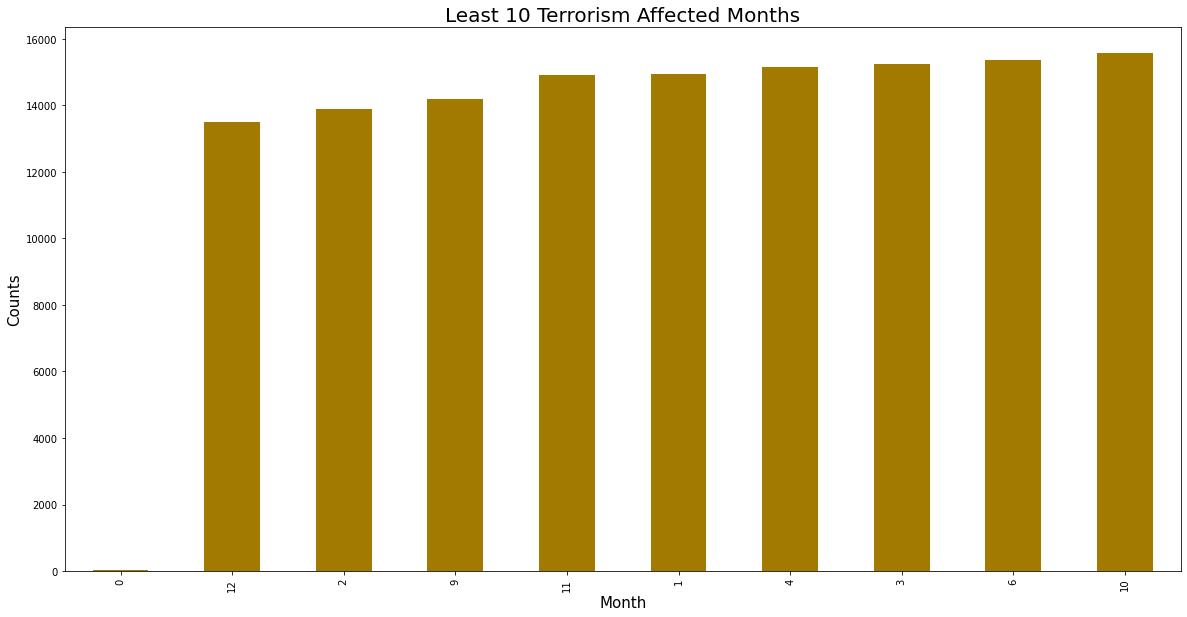

In [38]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Month'].value_counts().tail(10).sort_values(ascending = True).plot(kind = 'bar',color = '#A37A00')
ax1.set_xlabel('Month',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Least 10 Terrorism Affected Months',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The least terrorist affected month is " December" then, "February" and " September".  </h2>

</body>
</html>

# Top 10 Terrorism Affected Day 

In [39]:
global_terrorism.Day.value_counts().head(10)

15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
Name: Day, dtype: int64

Text(0.5, 1.0, 'Top 10 Terrorism Affected Days')

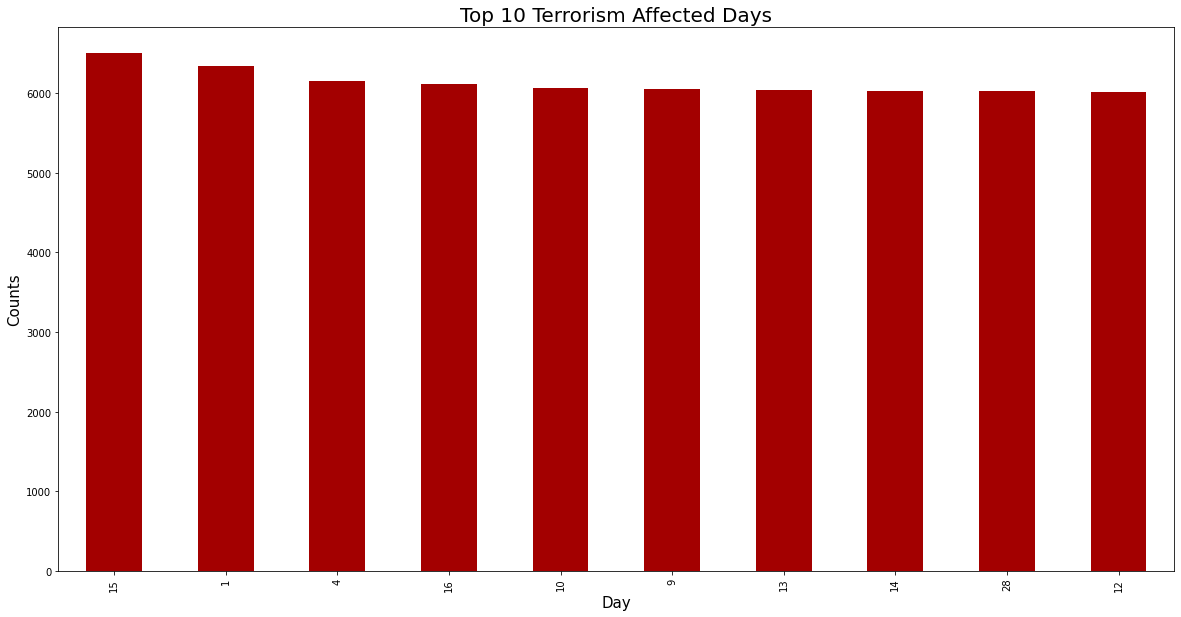

In [40]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Day'].value_counts().head(10).sort_values(ascending = False).plot(kind = 'bar',color = '#A30000')
ax1.set_xlabel('Day',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Top 10 Terrorism Affected Days',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The highest terrorist affected day is "day 15" followed by "day 1" and "day 4".</h2>

</body>
</html>

# Least 10 Terrorism Affected Day 

In [41]:
global_terrorism.Day.value_counts().tail(10)

21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      891
Name: Day, dtype: int64

Text(0.5, 1.0, 'Least 10 Terrorism Affected Days')

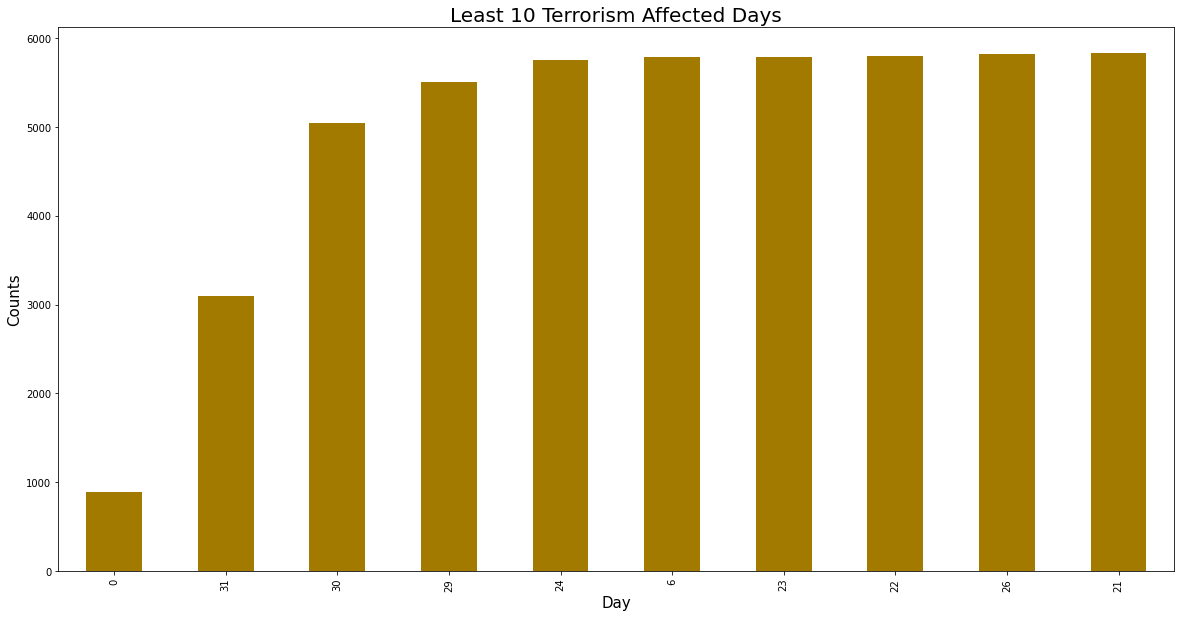

In [42]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Day'].value_counts().tail(10).sort_values(ascending = True).plot(kind = 'bar',color = '#A37A00')
ax1.set_xlabel('Day',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Least 10 Terrorism Affected Days',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The least terrorist affected day is "daty 31" then, "day 30" and "day 29".</h2>

</body>
</html>

# How many Terrorist group present in our dataset 

In [43]:
global_terrorism.Group.unique() # count of unique terrorist group

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [44]:
print("There are",global_terrorism['Group'].nunique(),"distinct terrorism group") # sum of unique terorist group

There are 3537 distinct terrorism group


In [45]:
global_terrorism['Group'].value_counts().head (10) # count of total number of groups on each terrorist groups (top 10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

In [46]:
global_terrorism['Group'].value_counts().tail (10) # count of total number of groups on each terrorist groups (least 10)

Patria y Libertad (Fatherland and Liberty)    1
Armed Communist Front                         1
Arab Commando Cells                           1
Mazdoor Kisan Sangram Samiti (MKSS)           1
Commando Internacionalista Simon Bolivar      1
Ansar Sarallah                                1
Sword of Islam                                1
Support of Ocalan-The Hawks of Thrace         1
Arab Revolutionary Front                      1
MANO-D                                        1
Name: Group, dtype: int64

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The highest count of  terrorist group is a unknown group. Then "Taliban" ihas highest number of groups, followed by "Islamic State of Iraq and the Levant (ISIL)" and " Shining Path (SL) ".<br>The least count of terrorist groups are "Patria y Libertad (Fatherland and Liberty)", "Armed Communist Front", "Arab Commando Cells" etc.   </h2>

</body>
</html>

# Group Name vs. Activity Trend

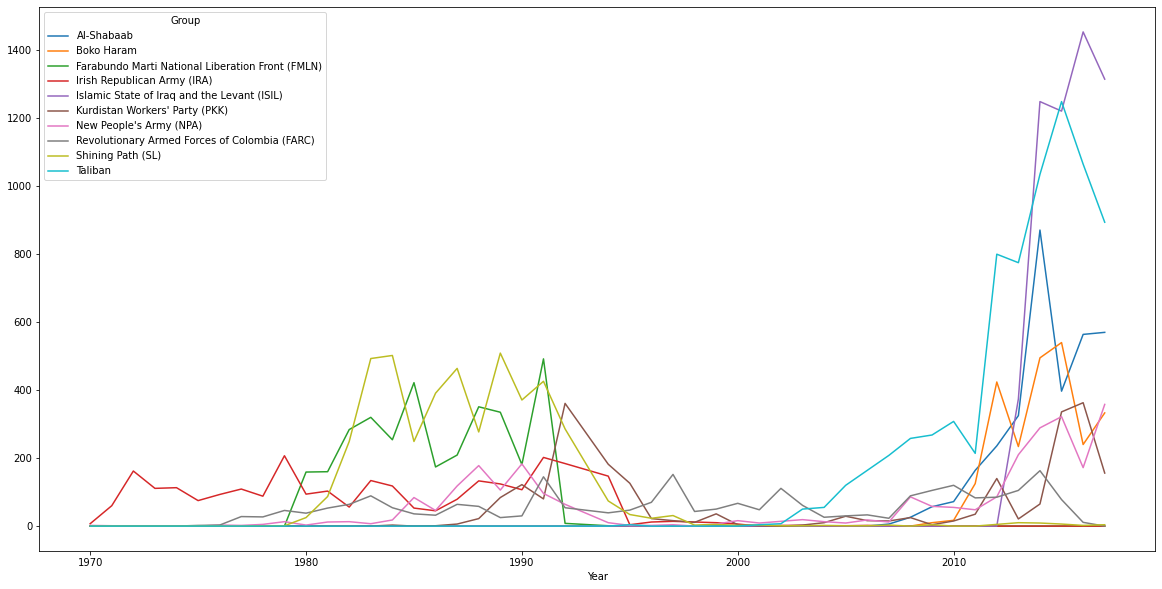

In [47]:
# Terrorist group and thier activities over the years

group_vs_activity = global_terrorism[global_terrorism['Group'].isin(global_terrorism['Group'].value_counts()[1:11].index)]
pd.crosstab(group_vs_activity.Year, group_vs_activity.Group).plot(figsize=(20,10))

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2> At 1970 the highest activity showed by the terrorist group named "Irish Republican army" but from the year 2000 highest activity shown by the terrorist group named " Taliban" then after the year 2010 the group named "Islamic state of Iraq and relevent" shown the highest activity,   </h2>

</body>
</html>

# Attack Methods

In [48]:
# most attack methods used by terrorist groups

global_terrorism.Weapon_type.value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

Text(0.5, 1.0, 'Attack Type')

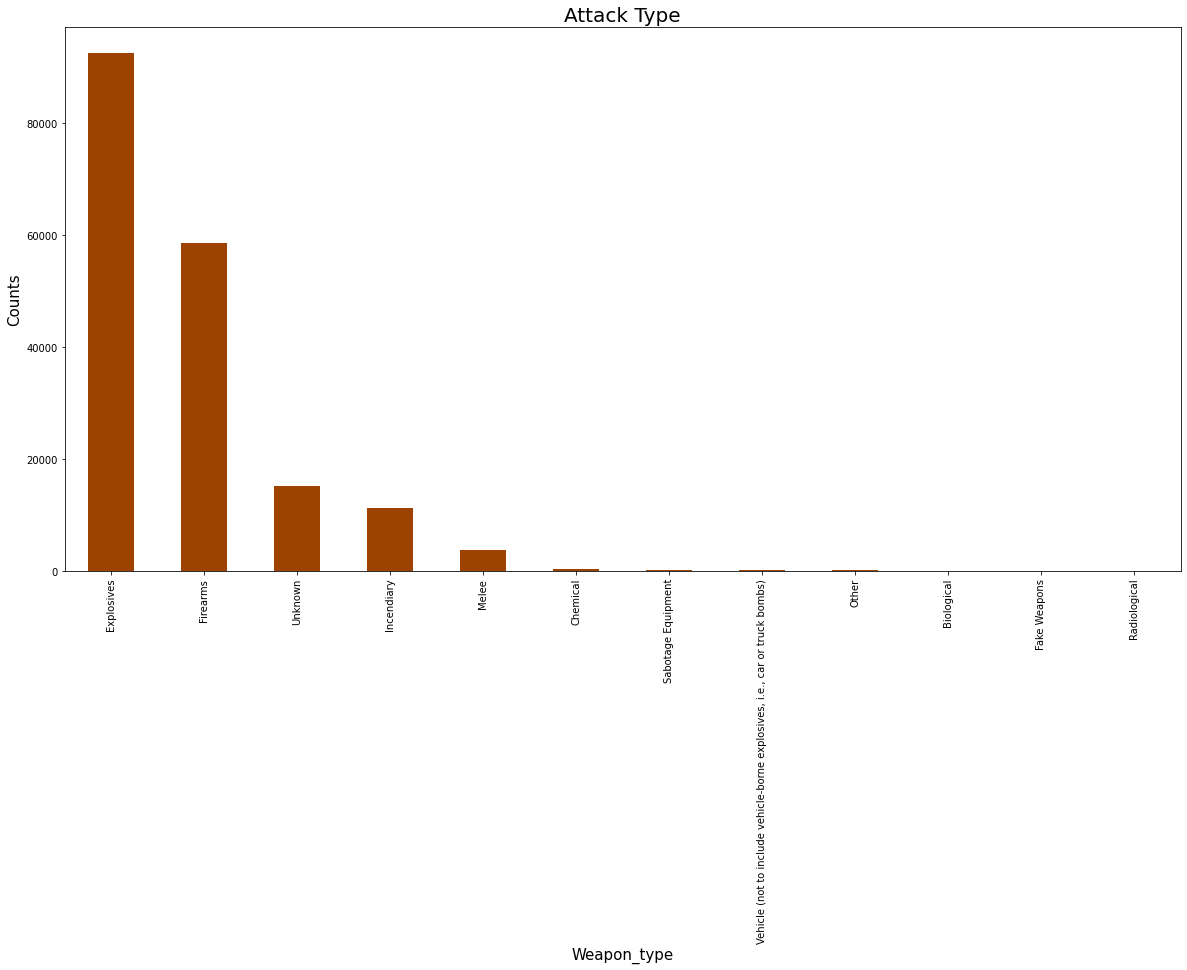

In [49]:
# Visualization

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Weapon_type'].value_counts().sort_values(ascending = False).plot(kind = 'bar',color = '#9E4200')
ax1.set_xlabel('Weapon_type',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Attack Type',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Most of the time terrorist attack done by  "Explosive" and "Firearms".</h2>

</body>
</html>

# Target Type 

In [50]:
# most target choosed by terrorist groups

global_terrorism.Target_type.value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

Text(0.5, 1.0, 'Target Type')

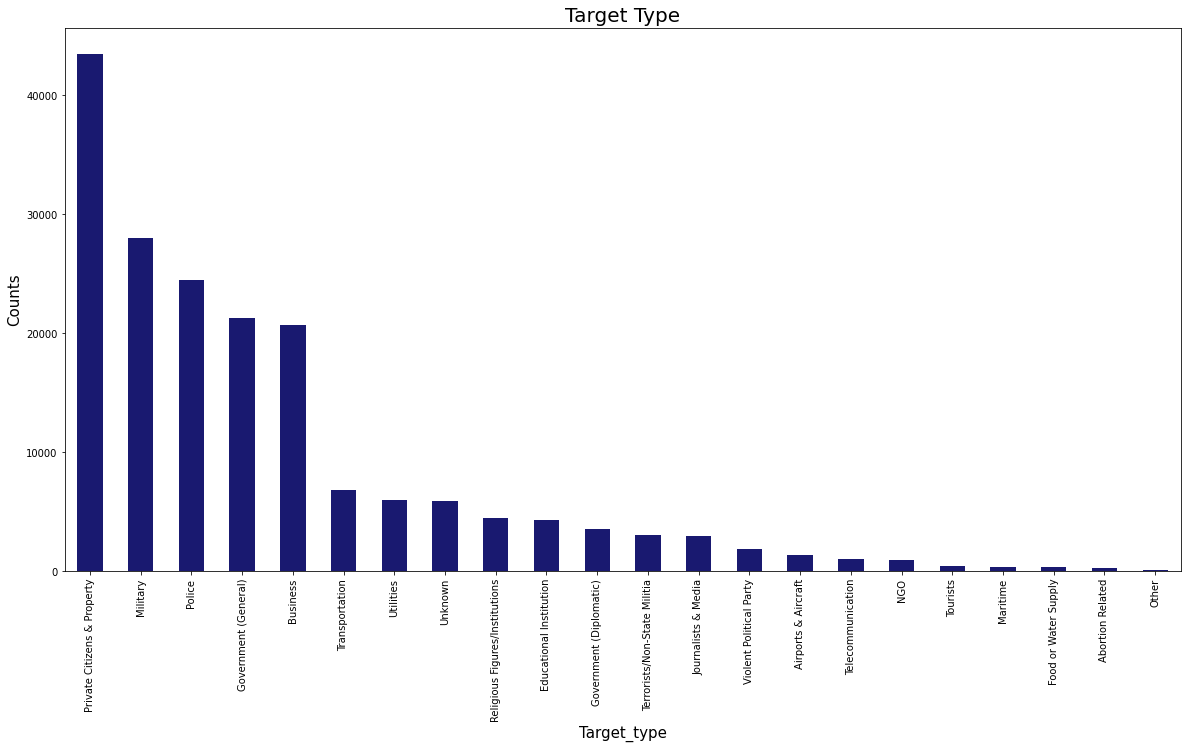

In [51]:
# Visualization 

plt.figure(figsize = (20,10))
ax1 = global_terrorism['Target_type'].value_counts().sort_values(ascending = False).plot(kind = 'bar',color = '#191970')
ax1.set_xlabel('Target_type',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Target Type',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Maximum time the terrorist groups target the "Private Citizens and Property", "Militant", " Police", "Goverment" and "Business work". </h2>

</body>
</html>

# Country wise attack, wheather it was successful or unsuccessful 

Text(0.5, 1.0, 'Country wise Attack and whether successful or not')

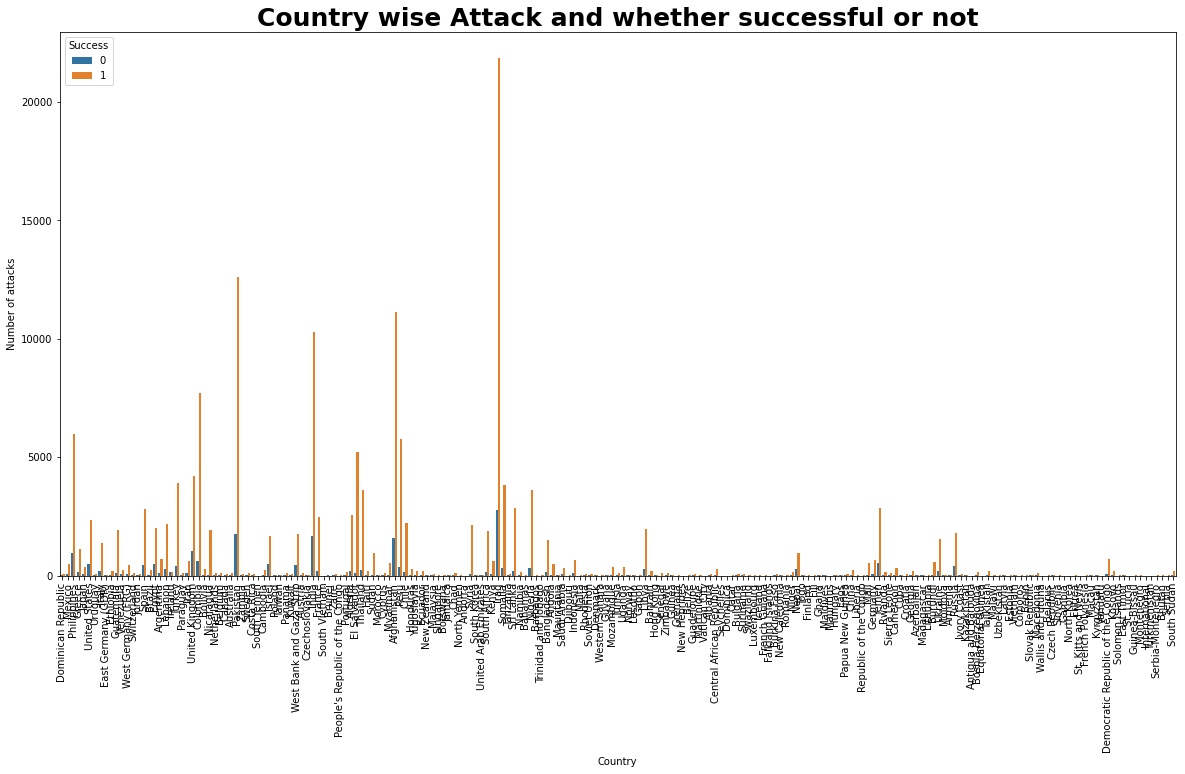

In [52]:
# Visualization 

plt.figure(figsize = (20,10))
sns.countplot(x=global_terrorism['Country'], hue='Success', data=global_terrorism)
plt.ylabel('Number of attacks')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title('Country wise Attack and whether successful or not',size=25, fontweight="bold")

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Highest success rate of terrorist attack in "Iraq" follwed by " Pakistan". </h2>

</body>
</html>

# Region wise attack, wheather it was successful or unsuccessful

Text(0.5, 1.0, 'Region wise Attack and whether successful or not')

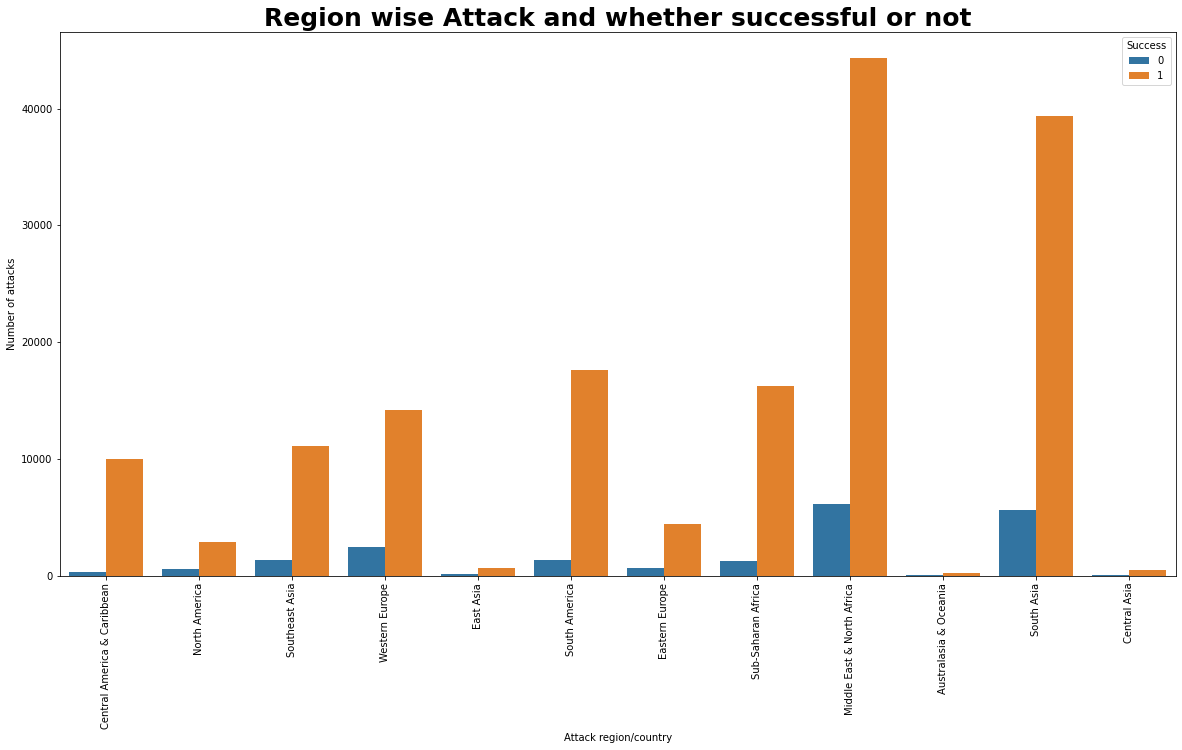

In [53]:
# Visualization 

plt.figure(figsize = (20,10))
sns.countplot(x=global_terrorism['Region'], hue='Success', data=global_terrorism)
plt.ylabel('Number of attacks')
plt.xticks(rotation=90)
plt.xlabel('Attack region/country')
plt.title('Region wise Attack and whether successful or not',size=25, fontweight="bold")

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Highest success attack occured in "Middle East & North America" followed by "South Asia".</h2>

</body>
</html>

# Percentage of Total Killed vs. Total Wounded by weapon types

In [54]:
num_kills = global_terrorism.groupby('Weapon_type')['Killed'].sum().reset_index()
num_wound = global_terrorism.groupby('Weapon_type')['Wounded'].sum().reset_index()

def attack_kills(df, col_name):
    new_df = df.rename(columns={'Killed':'kill_count'})
    total = new_df['kill_count'].sum()
    new_df['Percentage'] = new_df.apply(lambda x: (x['kill_count']/total)*100, axis=1)
    return new_df

def attack_wound(df,col_name):
    new_df = df.rename(columns={'Wounded':'wound_count'})
    total = new_df['wound_count'].sum()
    new_df['Percentage'] = new_df.apply(lambda x: (x['wound_count']/total)*100, axis=1)
    return new_df
    
new_kills = attack_kills(num_kills,'Weapon_type')
new_wound = attack_wound(num_wound,'Weapon_type')



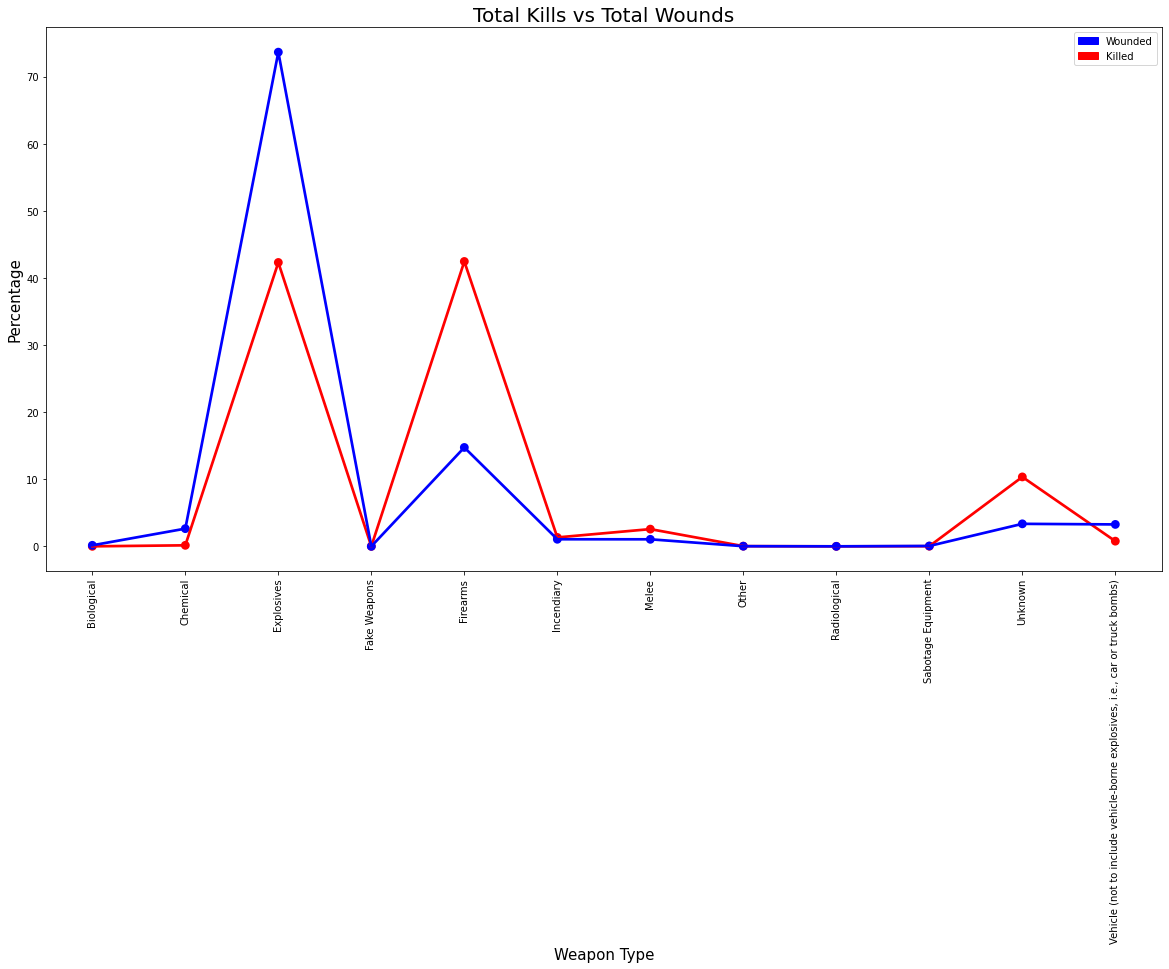

In [55]:
# Visualization 

plt.figure(figsize=[20,10])
sns.pointplot(x='Weapon_type', y='Percentage', data=new_kills, color='red')
sns.pointplot(x='Weapon_type', y='Percentage', data=new_wound, color='blue')
plt.xlabel('Weapon Type', size=15)
plt.ylabel('Percentage', size=15)
plt.xticks(rotation=90)
plt.title('Total Kills vs Total Wounds', size=20)

blue_lab = mpat.Patch(color='blue', label = 'Wounded')
red_lab = mpat.Patch(color='red', label = 'Killed')
plt.legend(handles=[blue_lab,red_lab])

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Highest casualities shown by using "Explosive" and "Firearms". </h2>

</body>
</html>

# Percentage of Total Killed vs. Total Wounded by target types

In [56]:
num_kills = global_terrorism.groupby('Target_type')['Killed'].sum().reset_index()
num_wound = global_terrorism.groupby('Target_type')['Wounded'].sum().reset_index()

def attack_kills(df, col_name):
    new_df = df.rename(columns={'Killed':'kill_count'})
    total = new_df['kill_count'].sum()
    new_df['Percentage'] = new_df.apply(lambda x: (x['kill_count']/total)*100, axis=1)
    return new_df

def attack_wound(df,col_name):
    new_df = df.rename(columns={'Wounded':'wound_count'})
    total = new_df['wound_count'].sum()
    new_df['Percentage'] = new_df.apply(lambda x: (x['wound_count']/total)*100, axis=1)
    return new_df
    
new_kills = attack_kills(num_kills,'Target_type')
new_wound = attack_wound(num_wound,'Target_type')



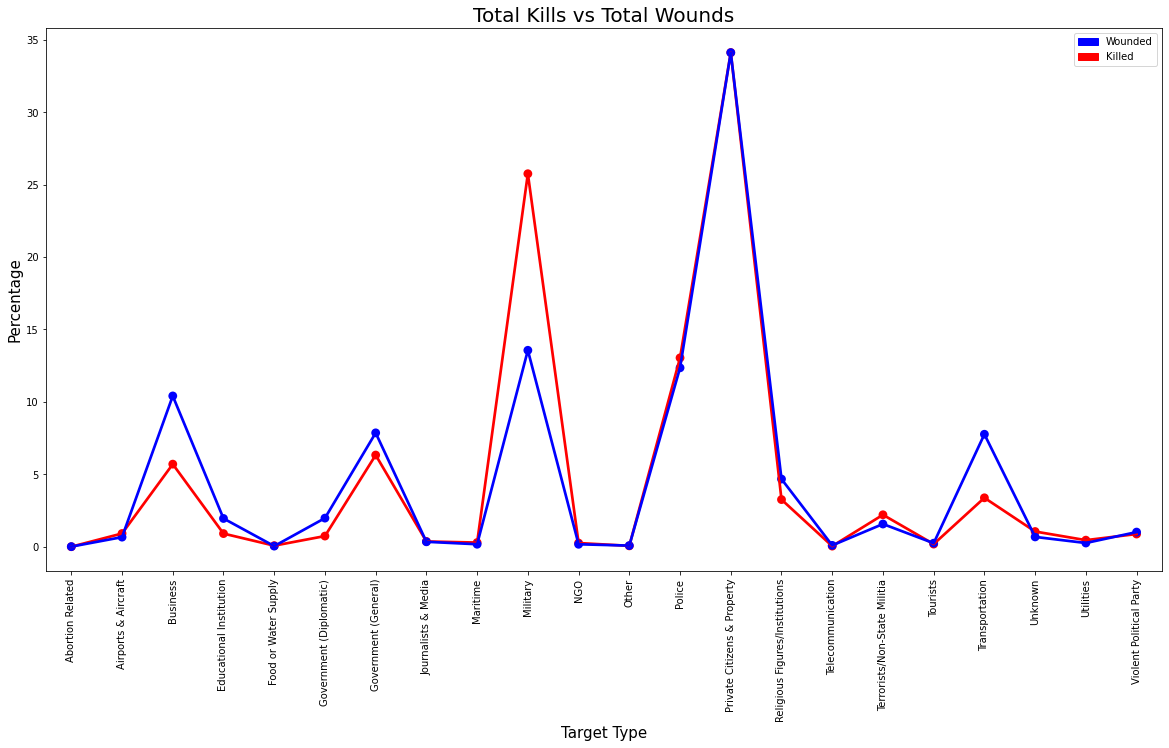

In [57]:
# Visualization 

plt.figure(figsize=[20,10])
sns.pointplot(x='Target_type', y='Percentage', data=new_kills, color='red')
sns.pointplot(x='Target_type', y='Percentage', data=new_wound, color='blue')
plt.xlabel('Target Type', size=15)
plt.ylabel('Percentage', size=15)
plt.xticks(rotation=90)
plt.title('Total Kills vs Total Wounds', size=20)

blue_lab = mpat.Patch(color='blue', label = 'Wounded')
red_lab = mpat.Patch(color='red', label = 'Killed')
plt.legend(handles=[blue_lab,red_lab])

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Highest casualities shown when the targets are " Private Citizens & property" and "Military". </h2>

</body>
</html>

# Percentage of Total Killed vs. Total Wounded by attack types

In [58]:
num_kills = global_terrorism.groupby('Attack_Type')['Killed'].sum().reset_index()
num_wound = global_terrorism.groupby('Attack_Type')['Wounded'].sum().reset_index()

def attack_kills(df, col_name):
    new_df = df.rename(columns={'Killed':'kill_count'})
    total = new_df['kill_count'].sum()
    new_df['Percentage'] = new_df.apply(lambda x: (x['kill_count']/total)*100, axis=1)
    return new_df

def attack_wound(df,col_name):
    new_df = df.rename(columns={'Wounded':'wound_count'})
    total = new_df['wound_count'].sum()
    new_df['Percentage'] = new_df.apply(lambda x: (x['wound_count']/total)*100, axis=1)
    return new_df
    
new_kills = attack_kills(num_kills,'Attack_Type')
new_wound = attack_wound(num_wound,'Attack_Type')



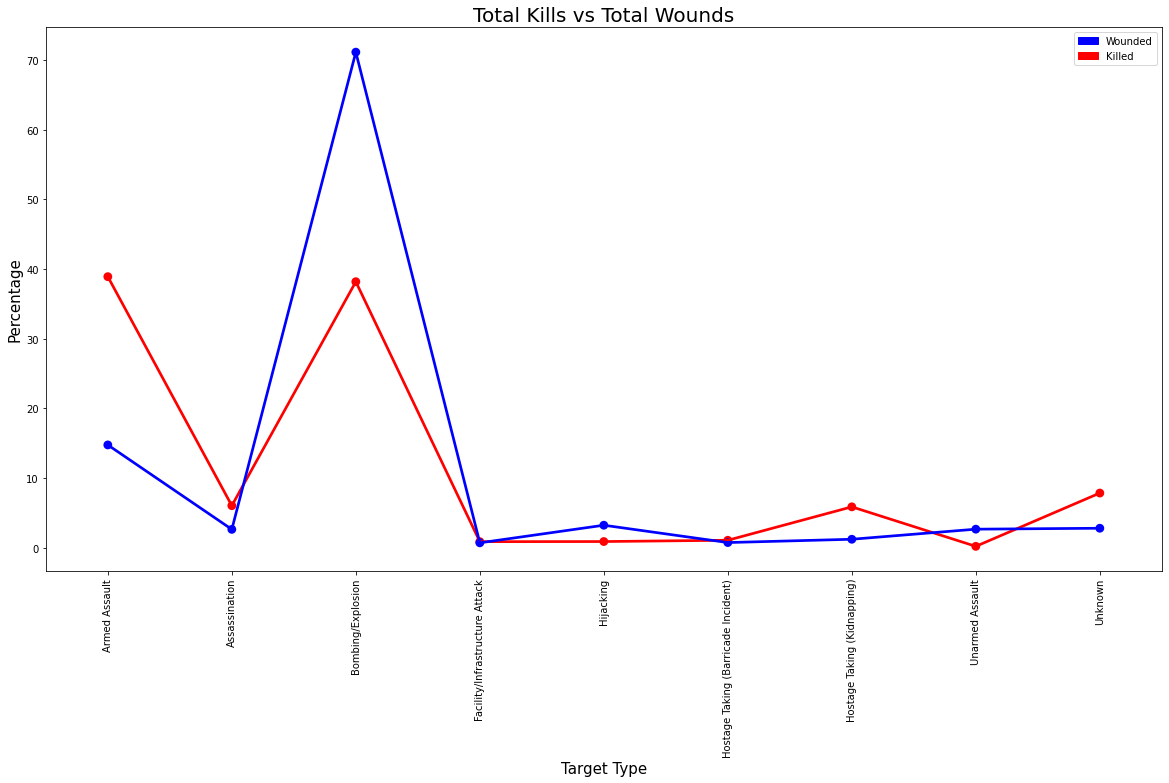

In [59]:
# Visualization 

plt.figure(figsize=[20,10])
sns.pointplot(x='Attack_Type', y='Percentage', data=new_kills, color='red')
sns.pointplot(x='Attack_Type', y='Percentage', data=new_wound, color='blue')
plt.xlabel('Target Type', size=15)
plt.ylabel('Percentage', size=15)
plt.xticks(rotation=90)
plt.title('Total Kills vs Total Wounds', size=20)

blue_lab = mpat.Patch(color='blue', label = 'Wounded')
red_lab = mpat.Patch(color='red', label = 'Killed')
plt.legend(handles=[blue_lab,red_lab])

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Highest casulities shown when terrorists are attacked by "bombing". </h2>

</body>
</html>

# Killed vs. Wound in Iraq

In [60]:
iraq_kills = global_terrorism[global_terrorism.Country == 'Iraq'].groupby('Attack_Type')['Killed'].sum().reset_index()
iraq_wound = global_terrorism[global_terrorism.Country == 'Iraq'].groupby('Attack_Type')['Wounded'].sum().reset_index()

new_iraqkill = attack_kills(iraq_kills,'Attack_Type')
new_iraqwound = attack_wound(iraq_wound,'Attack_Type')



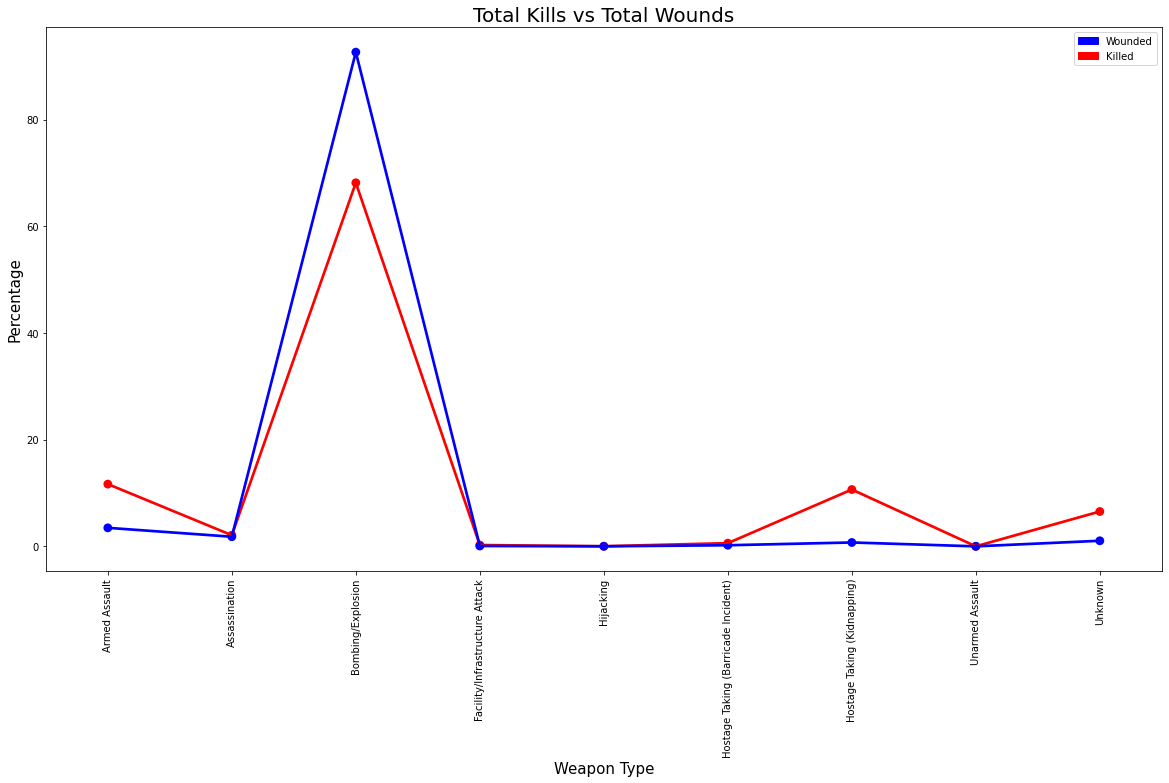

In [61]:
# Visualization 

plt.figure(figsize=[20,10])
sns.pointplot(x='Attack_Type', y='Percentage', data=new_iraqkill, color='red')
sns.pointplot(x='Attack_Type', y='Percentage', data=new_iraqwound, color='blue')
plt.xlabel('Weapon Type', size=15)
plt.ylabel('Percentage', size=15)
plt.xticks(rotation=90)
plt.title('Total Kills vs Total Wounds', size=20)

blue_lab = mpat.Patch(color='blue', label = 'Wounded')
red_lab = mpat.Patch(color='red', label = 'Killed')
plt.legend(handles=[blue_lab,red_lab])

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Maximum number of people in Iraq died by "Explotion". </h2>

</body>
</html>

# Killed vs. Wound in Pakistan

In [62]:
pak_kills = global_terrorism[global_terrorism.Country == 'Pakistan'].groupby('Attack_Type')['Killed'].sum().reset_index()
pak_wound = global_terrorism[global_terrorism.Country == 'Pakistan'].groupby('Attack_Type')['Wounded'].sum().reset_index()

new_pakkill = attack_kills(pak_kills,'Attack_Type')
new_pakwound = attack_wound(pak_wound,'Attack_Type')



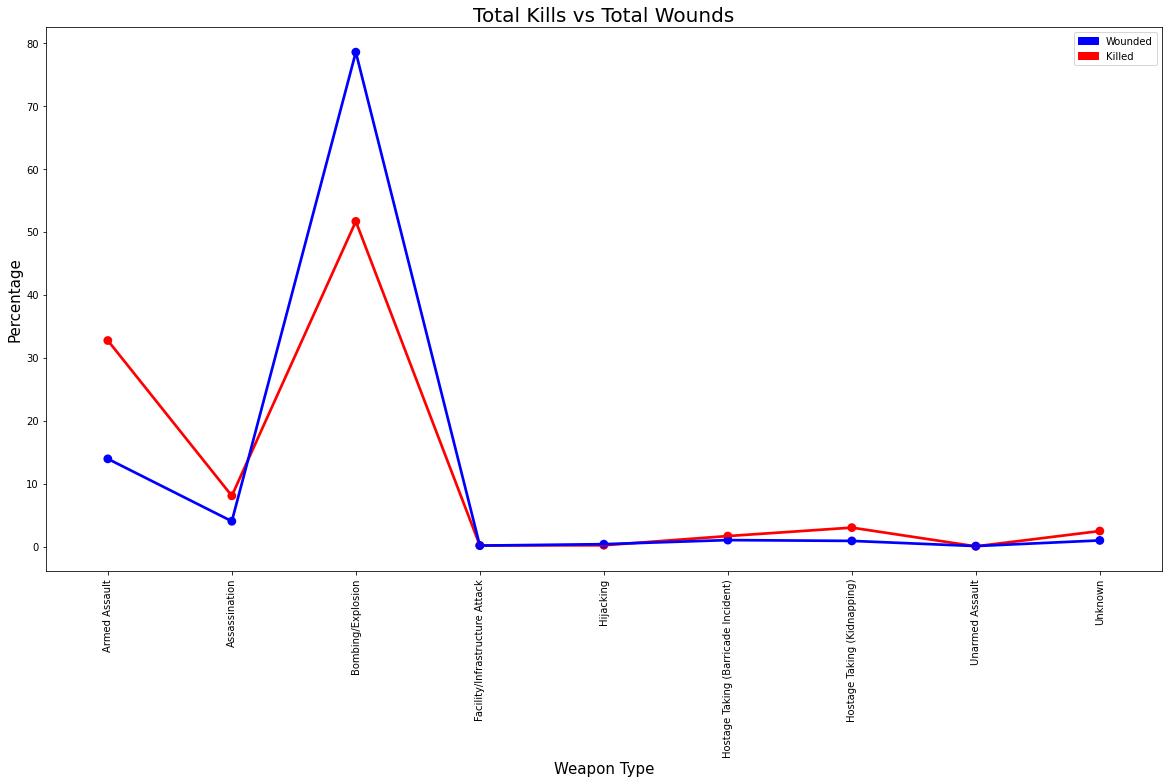

In [63]:
# Visualization 

plt.figure(figsize=[20,10])
sns.pointplot(x='Attack_Type', y='Percentage', data=new_pakkill, color='red')
sns.pointplot(x='Attack_Type', y='Percentage', data=new_pakwound, color='blue')
plt.xlabel('Weapon Type', size=15)
plt.ylabel('Percentage', size=15)
plt.xticks(rotation=90)
plt.title('Total Kills vs Total Wounds', size=20)

blue_lab = mpat.Patch(color='blue', label = 'Wounded')
red_lab = mpat.Patch(color='red', label = 'Killed')
plt.legend(handles=[blue_lab,red_lab])

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>In Pakistan also maximum number of people died cause of " Explotion". By "Armed assuslt", there approximately 35 % of people died. </h2>

</body>
</html>

# Terrorist group based on succes and failure 

In [64]:
top10 = global_terrorism.groupby('Group')['Year'].count().nlargest(11).index
df_top10 = global_terrorism[global_terrorism['Group'].isin(top10)]

In [65]:
df_temp = pd.DataFrame(df_top10[df_top10['Success']==1].groupby(df_top10['Group']).size(), columns=['Successful'])
df_temp['Not_Successful'] = df_top10[df_top10['Success']==0].groupby(df_top10['Group']).size()
df_temp['Sucess_Rate'] = (df_temp['Successful']/(df_temp['Successful'] + df_temp['Not_Successful']))*100


In [66]:
# df_temp.reset_index(inplace=True)
df_temp.head(20).sort_values(by = 'Sucess_Rate', ascending = False)

,Successful,Not_Successful,Sucess_Rate
Group,,,
Farabundo Marti National Liberation Front (FMLN),3317,34,98.985377
Shining Path (SL),4337,218,95.214050
Kurdistan Workers' Party (PKK),2175,135,94.155844
Boko Haram,2247,171,92.928040
Revolutionary Armed Forces of Colombia (FARC),2302,185,92.561319
Al-Shabaab,3016,272,91.727494
Taliban,6680,798,89.328698
New People's Army (NPA),2457,315,88.636364
Unknown,71748,11034,86.671015


<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The group "Farabundo Marti National Liberation Front (FMLN)" showed highest percentage of success rate, followed by "Shining Path (SL)" and "Kurdistan Workers' Party (PKK)".  </h2>

</body>
</html>

# Top 10 group based on Attack Type

Text(0, 0.5, 'Terrorist Group')

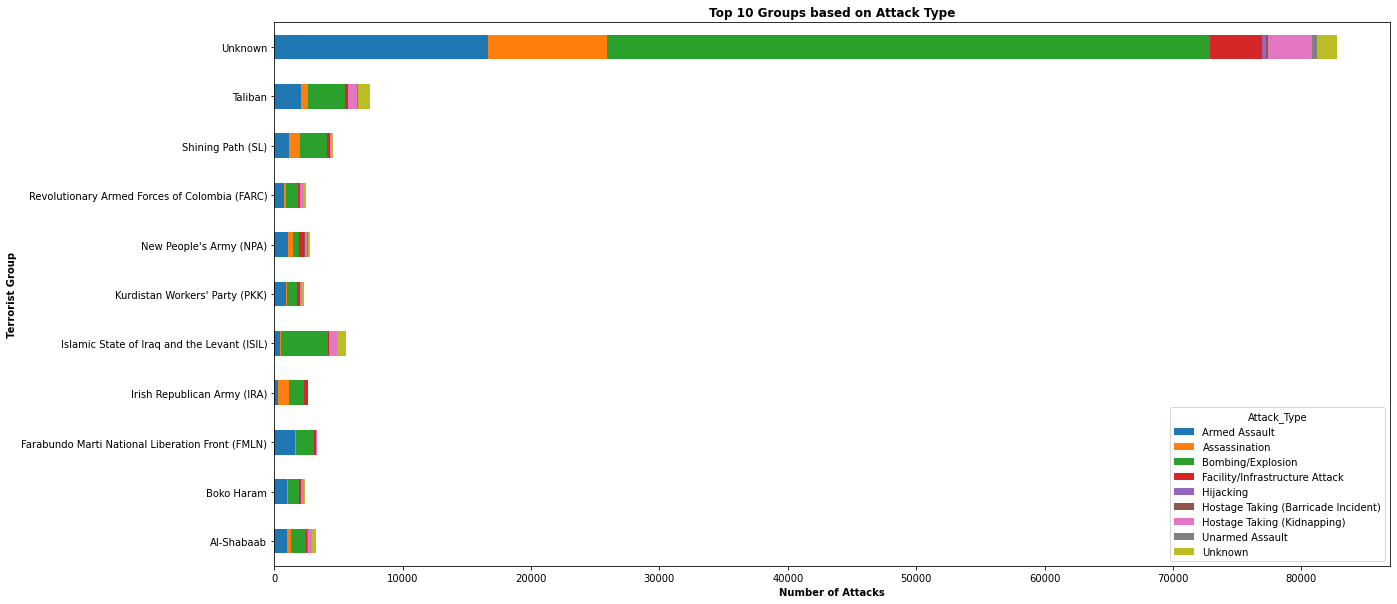

In [68]:
# Visualization 

pd.crosstab(df_top10['Group'],df_top10['Attack_Type']).plot.barh(stacked=True, figsize=(20,10))
plt.title('Top 10 Groups based on Attack Type', weight='bold')
plt.xlabel('Number of Attacks', weight='bold')
plt.ylabel('Terrorist Group', weight='bold')

# Top 10 group based on Weapon type

Text(0, 0.5, 'Terrorist Group')

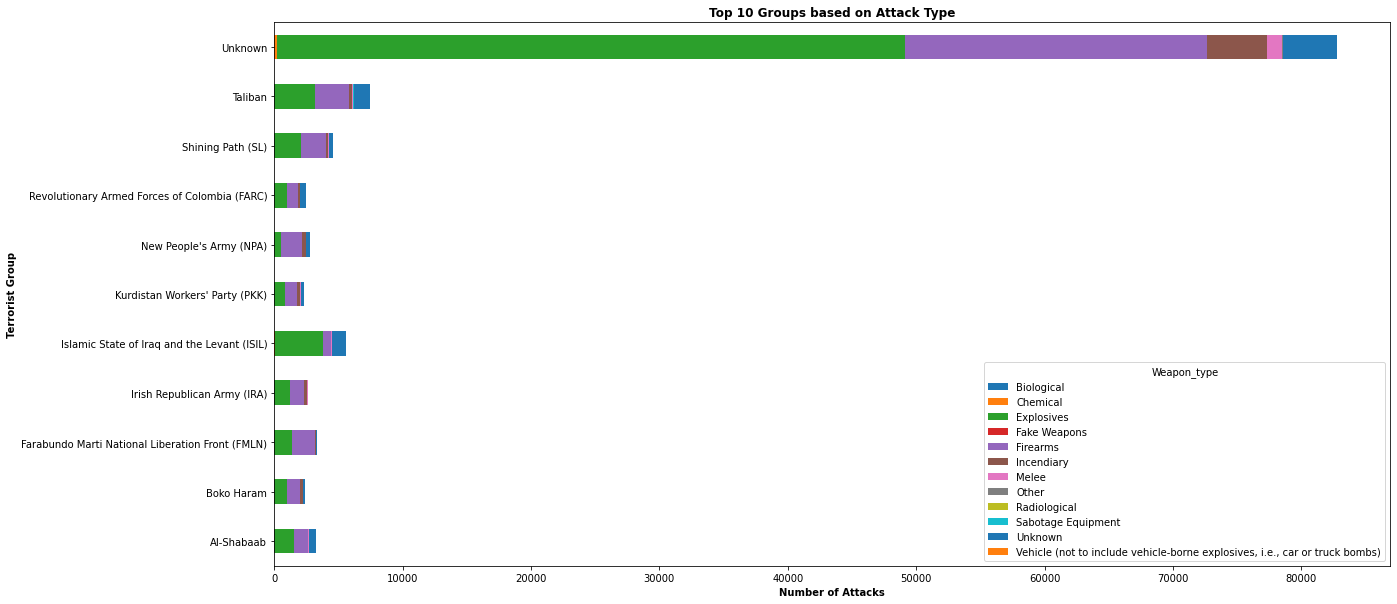

In [69]:
# Visualization 

pd.crosstab(df_top10['Group'],df_top10['Weapon_type']).plot.barh(stacked=True, figsize=(20,10))
plt.title('Top 10 Groups based on Attack Type', weight='bold')
plt.xlabel('Number of Attacks', weight='bold')
plt.ylabel('Terrorist Group', weight='bold')

# Terror hotspots in the World

In [72]:
map = pd.DataFrame(global_terrorism, columns = ['latitude','longitude']) 
map.head()

,latitude,longitude
0,18.456792,-69.951164
1,19.371887,-99.086624
2,15.478598,120.599741
3,37.997490,23.762728
4,33.580412,130.396361


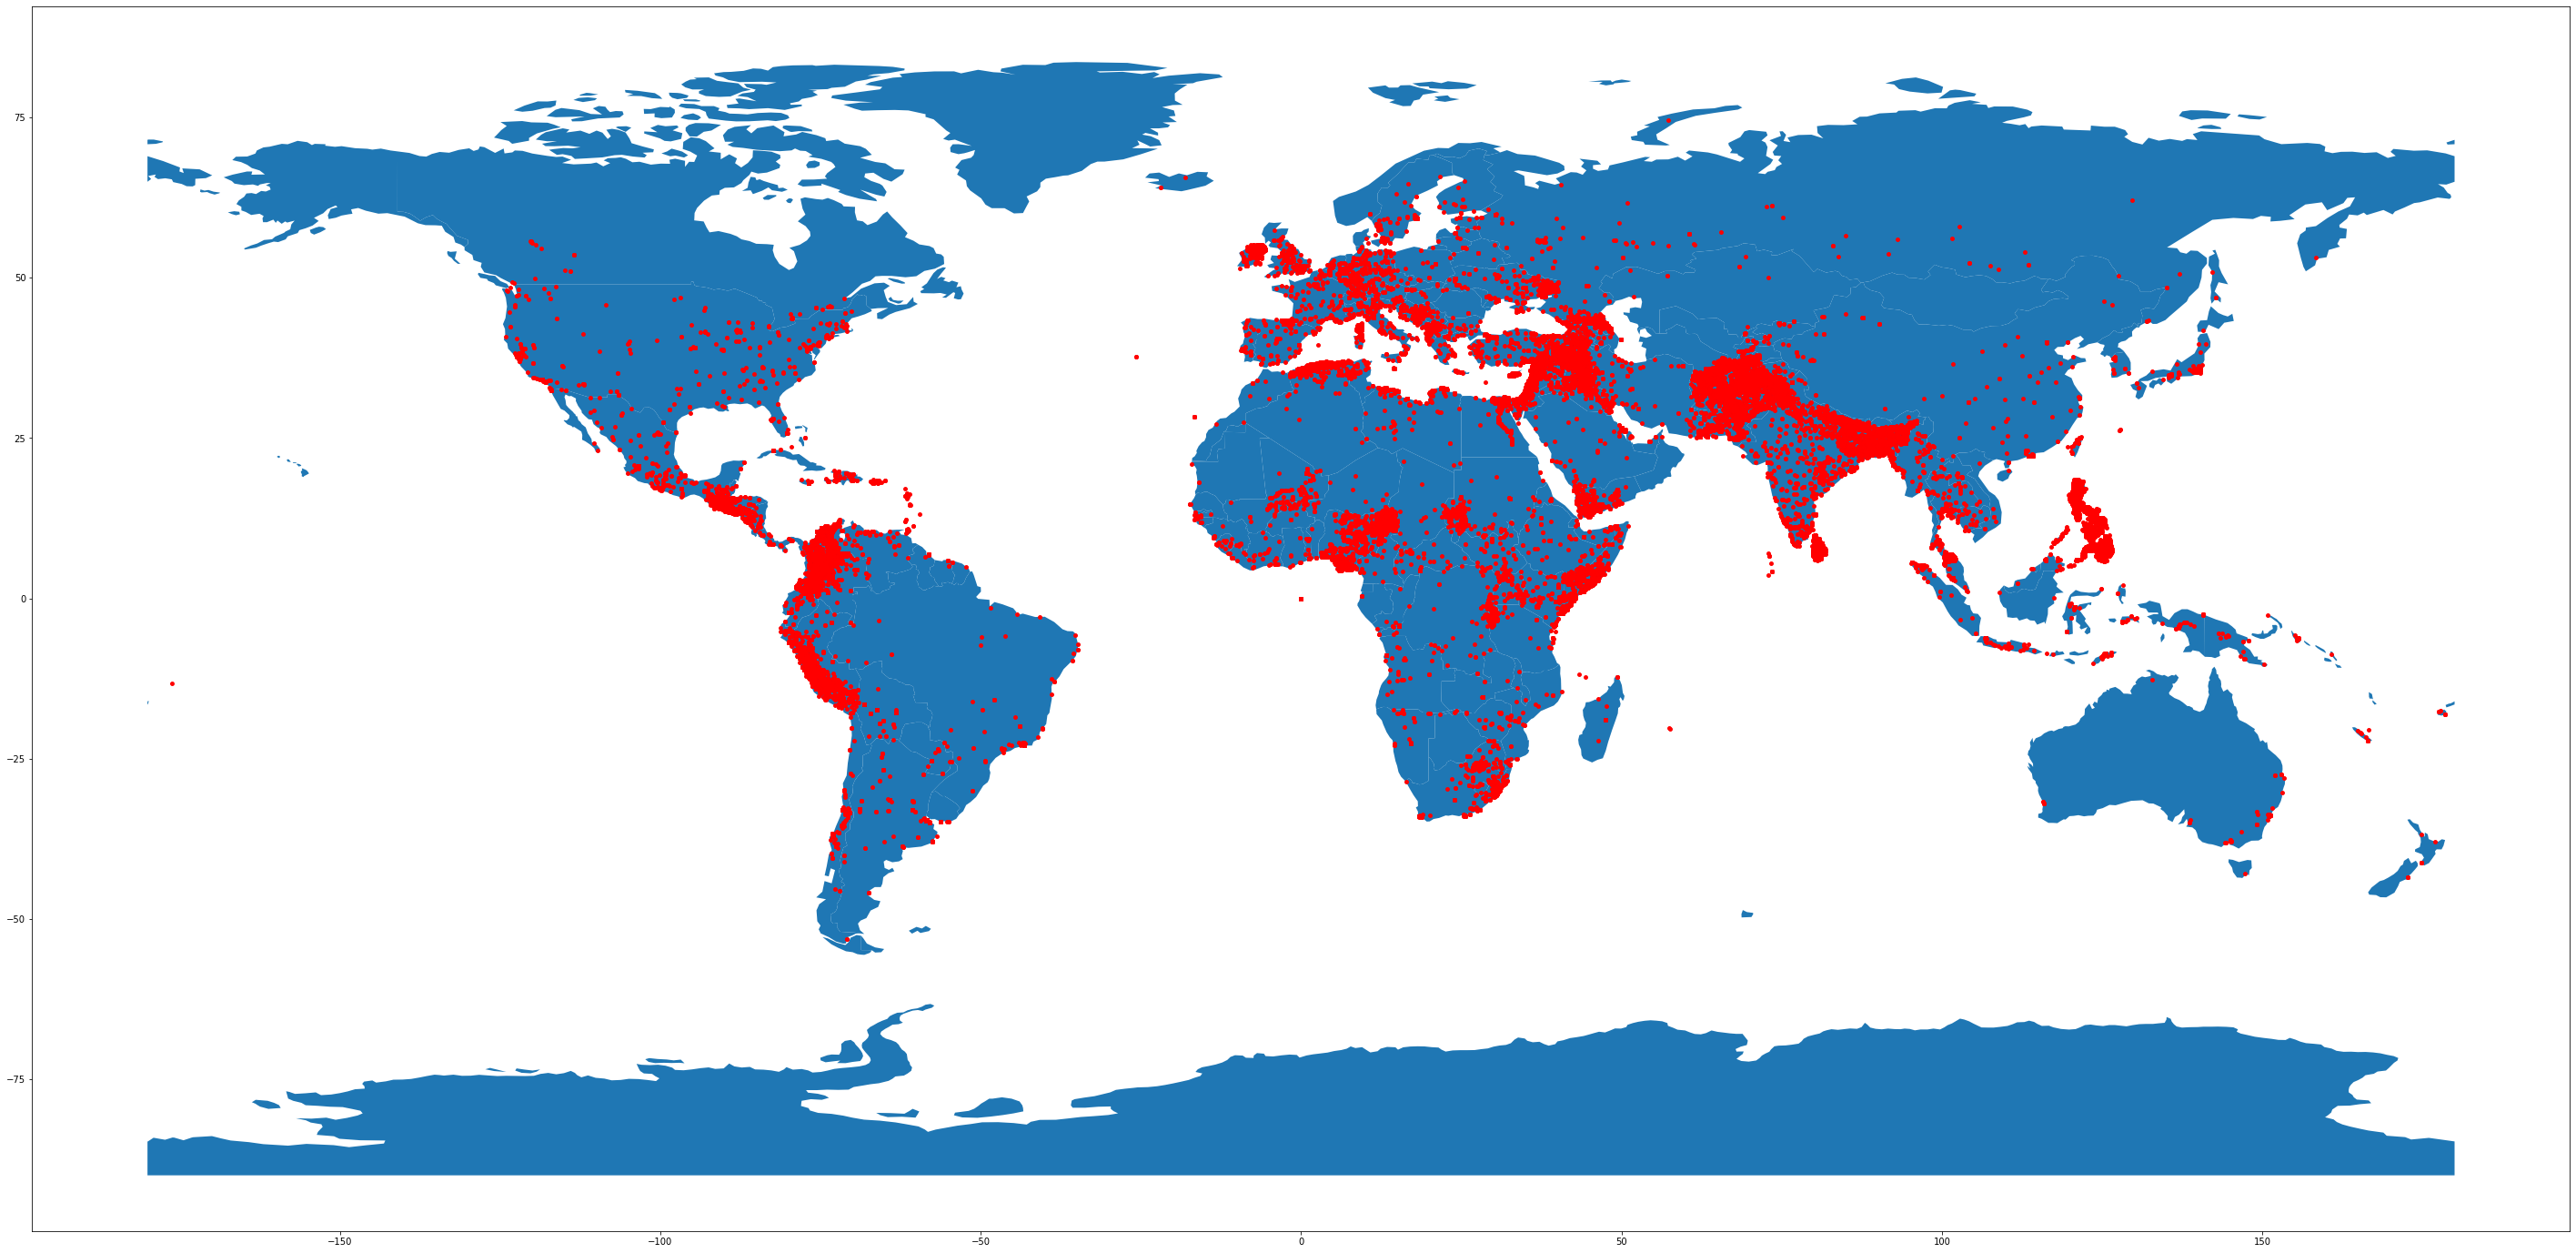

In [74]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geometry = [Point(xy) for xy in zip(df_top10['longitude'], df_top10['latitude'])]
geo_df = gpd.GeoDataFrame(df_top10, geometry=geometry)
geo_df.plot(ax=world.plot(figsize=(50, 25)), marker='o', color='red', markersize=15)

# <h1>**Terrorism In India** </h1>



In [75]:
df_India = global_terrorism[global_terrorism['Country']== 'India'] 

In [76]:
df_India.head(5)

,Year,Month,Day,Country,State,Region,latitude,longitude,Attack_Type,Success,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
1186,1972,2,22,India,Delhi,South Asia,28.585836,77.153336,Hijacking,1,B-747,0.0,0.0,0,Palestinians,Airports & Aircraft,Explosives,0
2764,1975,1,2,India,Bihar,South Asia,25.863042,85.781004,Bombing/Explosion,1,Lalit Narayan Mishra and a legislator,4.0,0.0,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown
3857,1976,5,26,India,Delhi,South Asia,28.585836,77.153336,Bombing/Explosion,1,New Delhi airport,0.0,0.0,0,Unknown,Airports & Aircraft,Explosives,0
5327,1977,9,28,India,Maharashtra,South Asia,19.075984,72.877656,Hijacking,1,DC-8,0.0,0.0,0,Japanese Red Army (JRA),Airports & Aircraft,Firearms,0
7337,1979,1,13,India,Assam,South Asia,26.200605,92.937574,Armed Assault,1,patrol,0.0,0.0,0,Naga People,Police,Firearms,0


# Top 10 Terrorist affected region

In [77]:
df_India.State.value_counts().head(10) # top 10 terrorism affected regions of India

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Name: State, dtype: int64

Text(0.5, 1.0, 'Top 10 Terrorism Affected States')

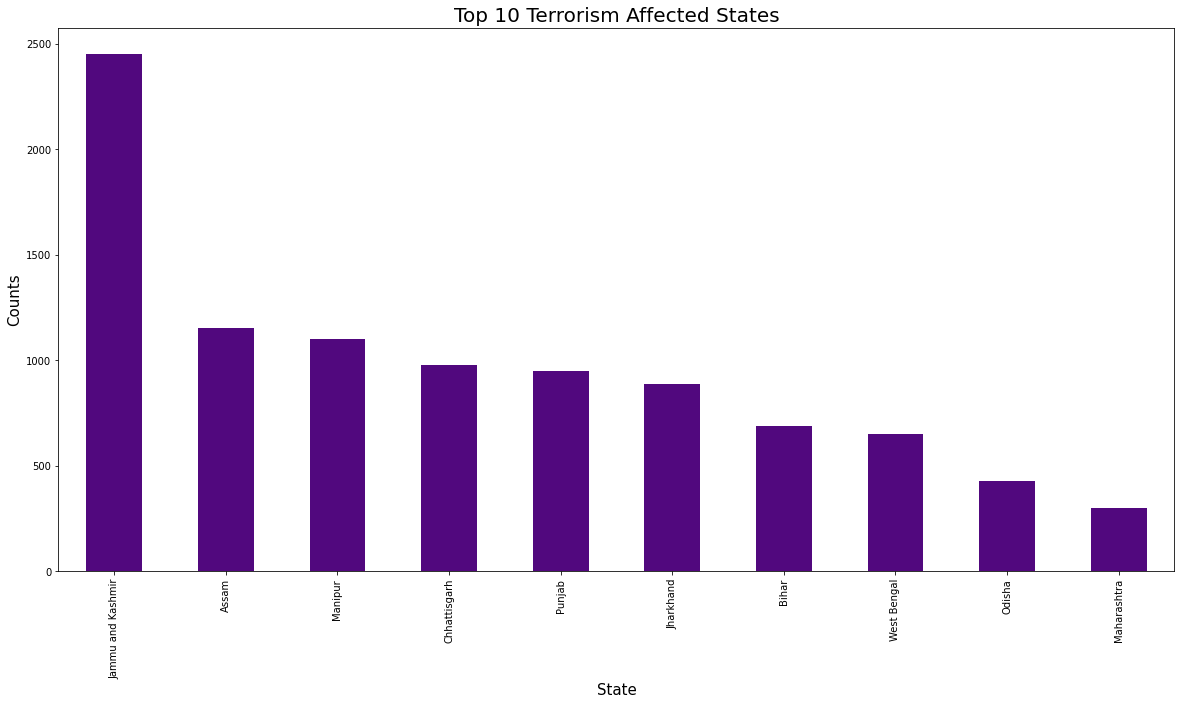

In [78]:
# Visualization 

plt.figure(figsize = (20,10))
ax1 = df_India['State'].value_counts().head(10).sort_values(ascending = False).plot(kind = 'bar',color = '#51087E')
ax1.set_xlabel('State',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Top 10 Terrorism Affected States',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The highest terrorist affected State in India is " Jammu & Kashmir", followed by "Assam" and "Manipur". "West Bengal" stay in 4th position.</h2>

</body>
</html>

# Least 10 Terrorist affected region

In [79]:
df_India.State.value_counts().tail(10)

Rajasthan            43
Andhra pradesh       41
Mizoram              27
Uttaranchal          24
Himachal Pradesh     24
Arunachal Pradesh    24
Telangana            24
Goa                   5
Sikkim                4
Puducherry            2
Name: State, dtype: int64

Text(0.5, 1.0, 'Top 10 Terrorism Affected States')

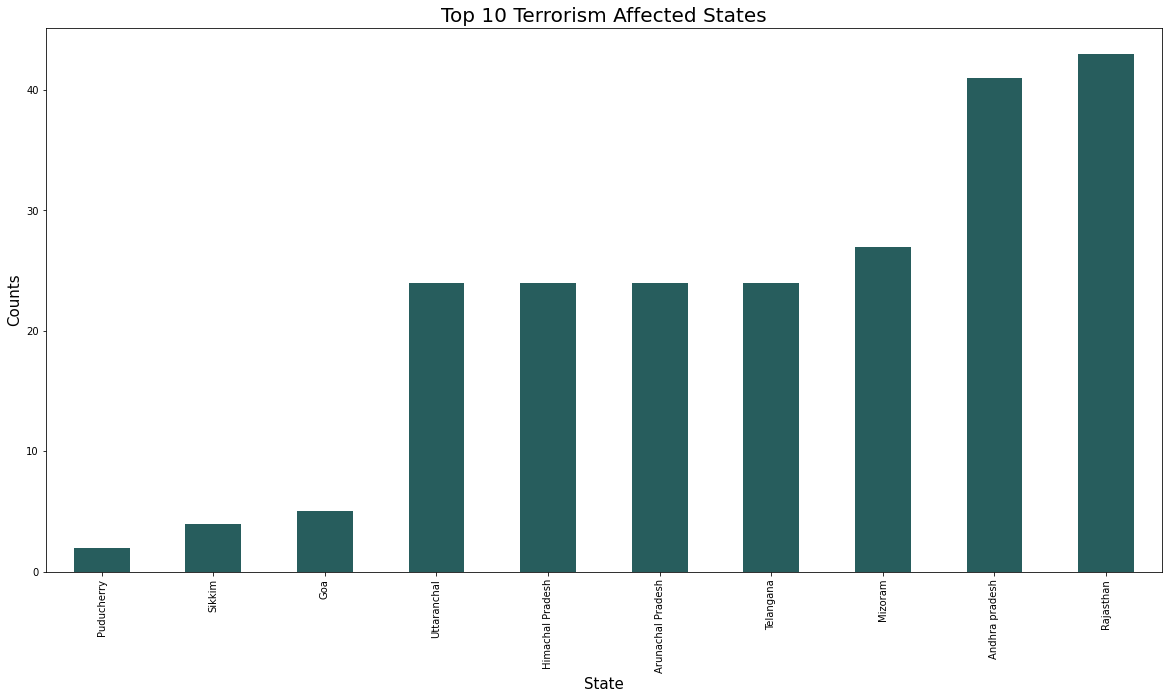

In [80]:
# Visualization 

plt.figure(figsize = (20,10))
ax1 = df_India['State'].value_counts().tail(10).sort_values(ascending = True).plot(kind = 'bar',color = '#275D5D')
ax1.set_xlabel('State',size = 15)
ax1.set_ylabel('Counts',size = 15)
plt.title('Top 10 Terrorism Affected States',size = 20)

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The least terrorist affected state in India is "Puduchery" then, "Sikkim" and "Goa".</h2>

</body>
</html>

# Terrorist activities over the years

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


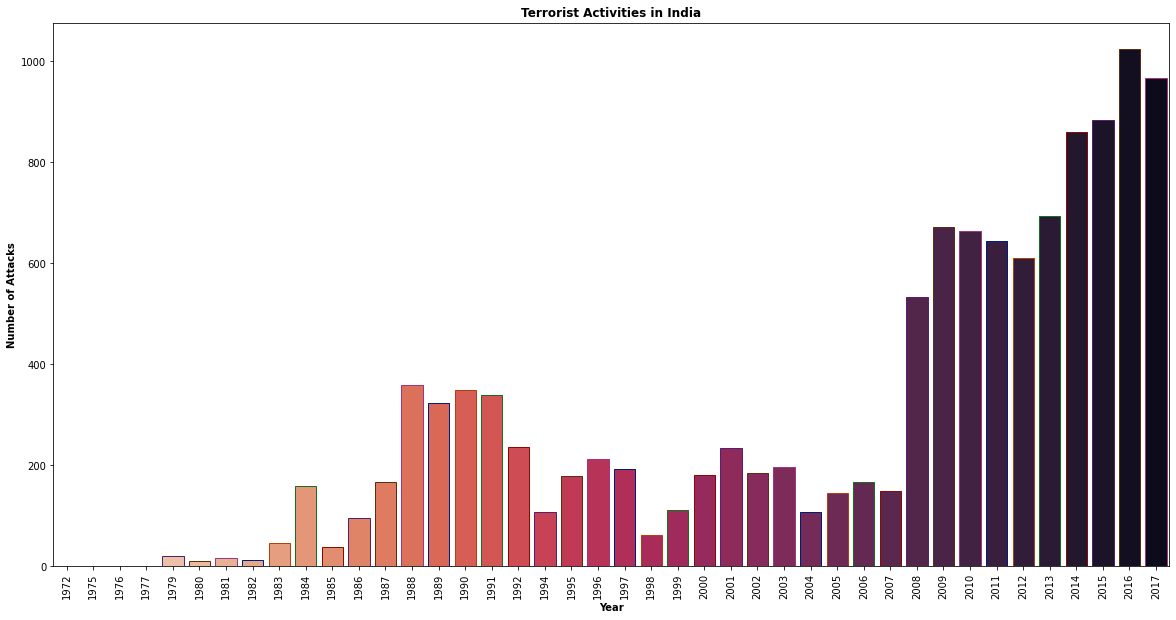

In [81]:
# Visualization 

plt.figure(figsize=(20,10))
sns.countplot('Year',data=df_India,palette='rocket_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks', weight='bold')
plt.xlabel('Year', weight='bold')
plt.title('Terrorist Activities in India', weight='bold')
plt.show()

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>In India most terrorist attack happened in the year "2016" followed by "2017" and "2015", and least terrorist attack happened in India in the year "1980","1982"and "1981" respectively.<br> There is no terrorist attack in the year "1972","1975","1976",and "1977". </h2>

</body>
</html>

# Activities of terrorist group over the years

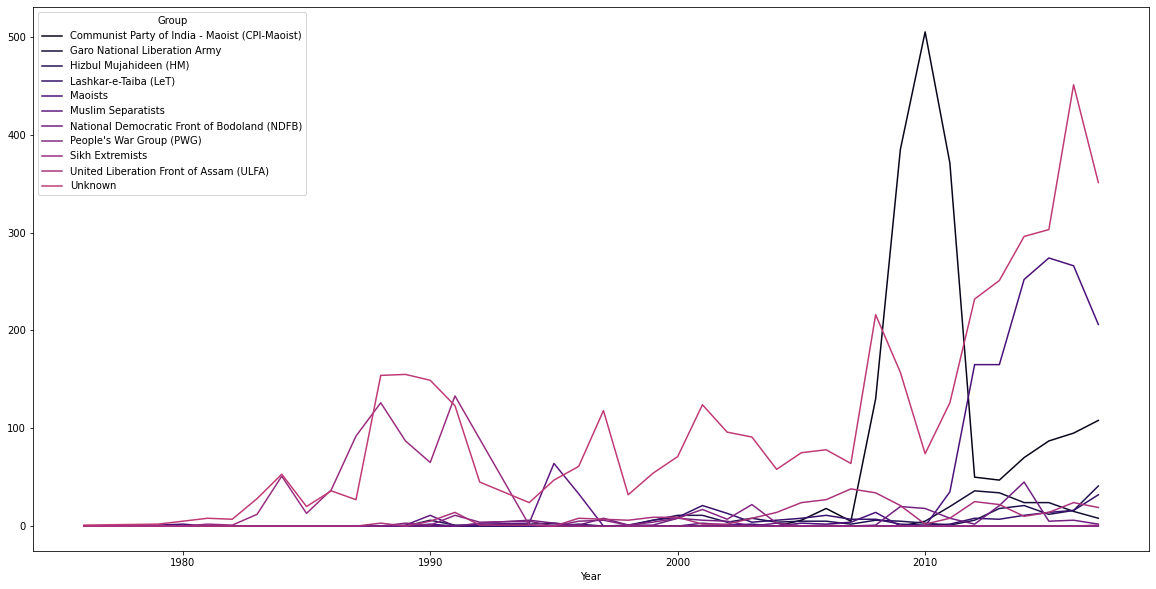

In [82]:
# visualization of activities of top 10 terrorist groups over the years 
 
pd.crosstab(df_India[df_India['Group'].isin(df_India['Group'].value_counts()[:11].index)]['Year'],
            df_India[df_India['Group'].isin(df_India['Group'].value_counts()[:11].index)]['Group']).plot(color=sns.color_palette('magma',20),figsize=(20,10))

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>In India most active terrorist group is a "Unknown" terrorist group. After the year 2010 their activity some how increased. There is another terrorist group "Communist Part of India - Maiost(CPI - Maoist)" who suddenly arise in the year 2007-2008 and after the year 2010 their activity decreased. </h2>

</body>
</html>

# Target type in India 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


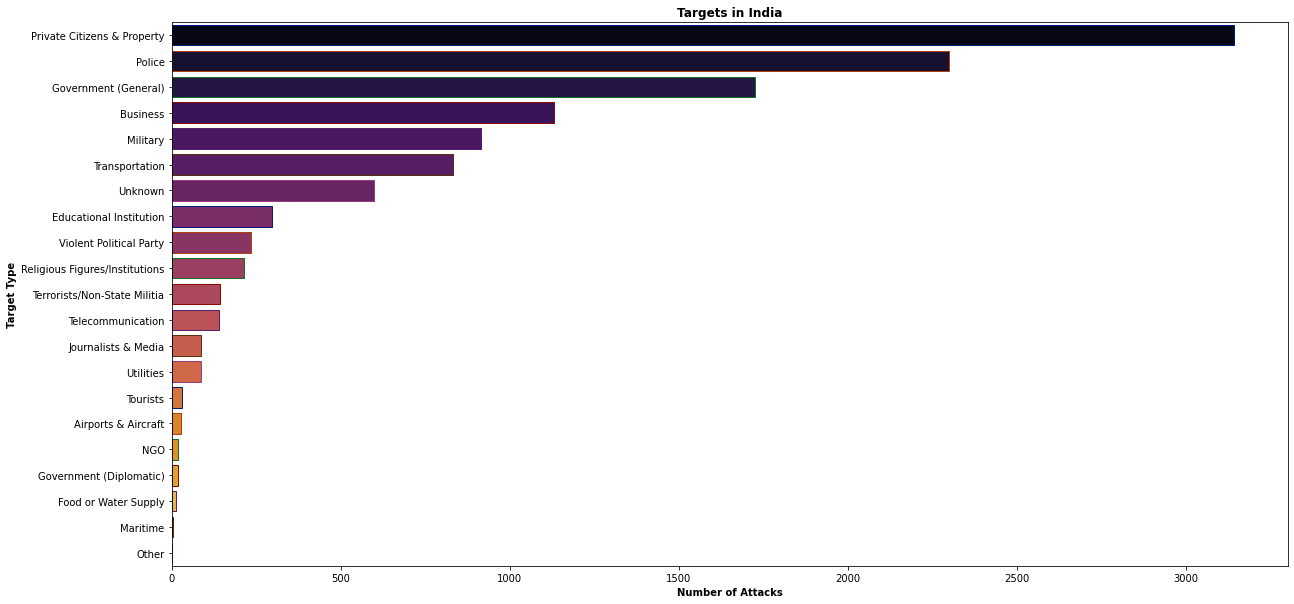

In [83]:
# Visualization of most choosed tagets in India 

plt.figure(figsize=(20,10))
sns.barplot(df_India['Target_type'].value_counts().tolist(),df_India['Target_type'].value_counts().index.tolist(),palette='inferno',edgecolor=sns.color_palette('dark',7))
#plt.xticks(rotation=90)
plt.ylabel('Target Type', weight='bold')
plt.xlabel('Number of Attacks', weight='bold')
plt.title('Targets in India', weight='bold')
plt.show()

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>The most choosed targets in India are "Private Citizens & Property" followed by "Police" and "Goverment(general)". </h2>

</body>
</html>

# Killed vs. Wounded in India 

In [84]:
India_kills = global_terrorism[global_terrorism.Country == 'India'].groupby('Attack_Type')['Killed'].sum().reset_index()
India_wounds = global_terrorism[global_terrorism.Country == 'India'].groupby('Attack_Type')['Wounded'].sum().reset_index()
new_Indiakill = attack_kills(India_kills,'Attack_Type')
new_Indiawound = attack_wound(India_wounds,'Attack_Type')



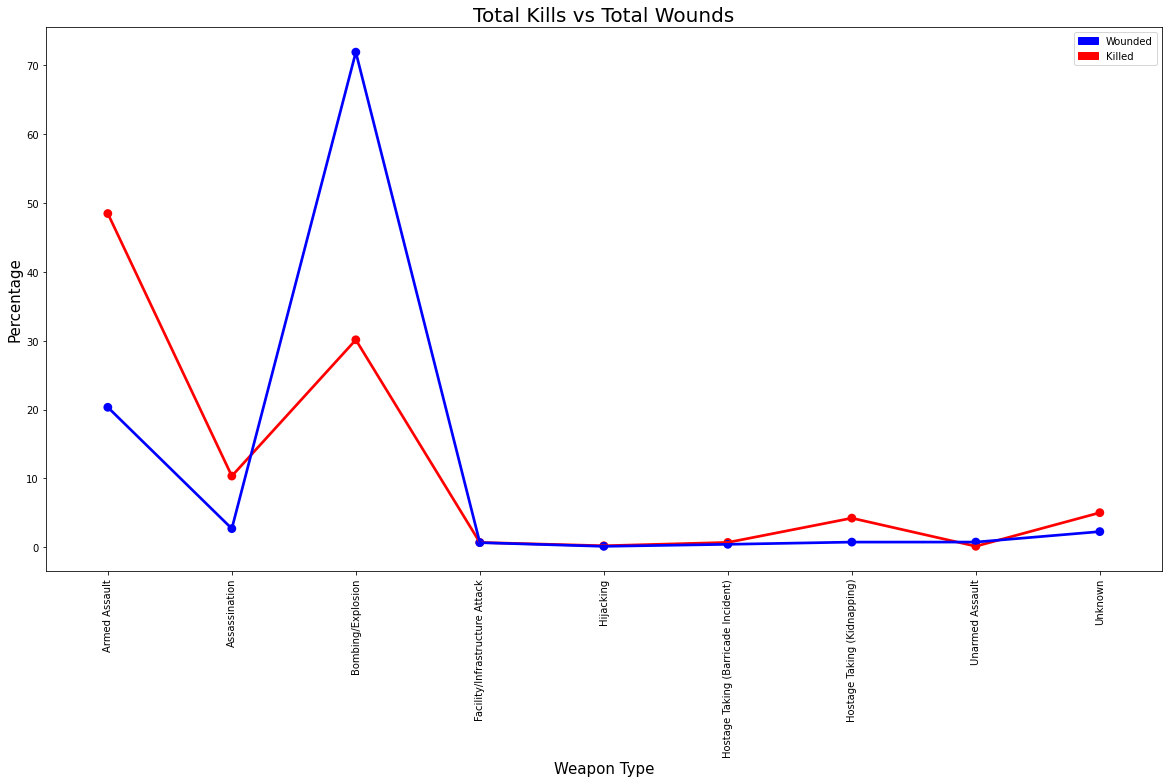

In [85]:
# Visualization 

plt.figure(figsize=[20,10])
sns.pointplot(x='Attack_Type', y='Percentage', data=new_Indiakill, color='red')
sns.pointplot(x='Attack_Type', y='Percentage', data=new_Indiawound, color='blue')
plt.xlabel('Weapon Type', size=15)
plt.ylabel('Percentage', size=15)
plt.xticks(rotation=90)
plt.title('Total Kills vs Total Wounds', size=20)

blue_lab = mpat.Patch(color='blue', label = 'Wounded')
red_lab = mpat.Patch(color='red', label = 'Killed')
plt.legend(handles=[blue_lab,red_lab])

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Most Killed in India by "Armed Assault" and most wounded by "Bombing/Explotion". So most casualities shown in India by "Armed Assault" and "Bombing/Explotion". </h2>

</body>
</html>

# State wise attack, wheather it was successful or unsuccessful

Text(0.5, 1.0, 'State wise Attack and whether successful or not')

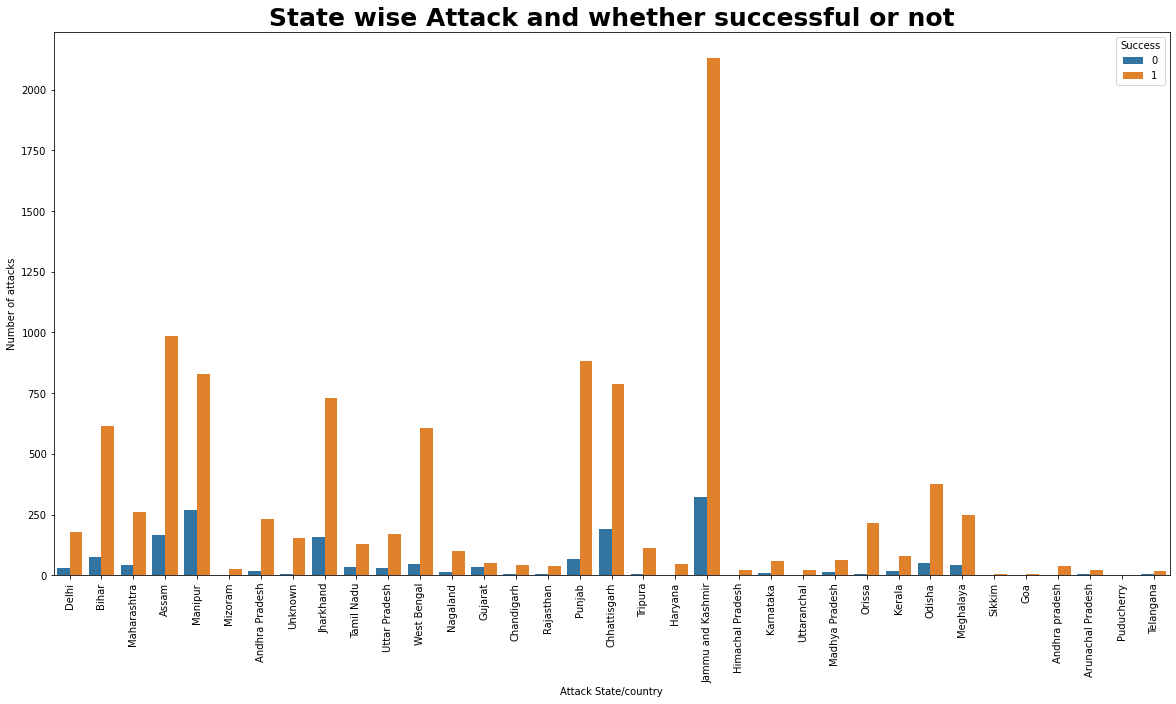

In [86]:
# Visualization 

plt.figure(figsize = (20,10))
sns.countplot(x=df_India['State'], hue='Success', data=df_India)
plt.ylabel('Number of attacks')
plt.xticks(rotation=90)
plt.xlabel('Attack State/country')
plt.title('State wise Attack and whether successful or not',size=25, fontweight="bold")

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Most successful terrorist attack(above 2000) happend in "Jammu & Kashmir". </h2>

</body>
</html>

# Percentage of Attack Type 

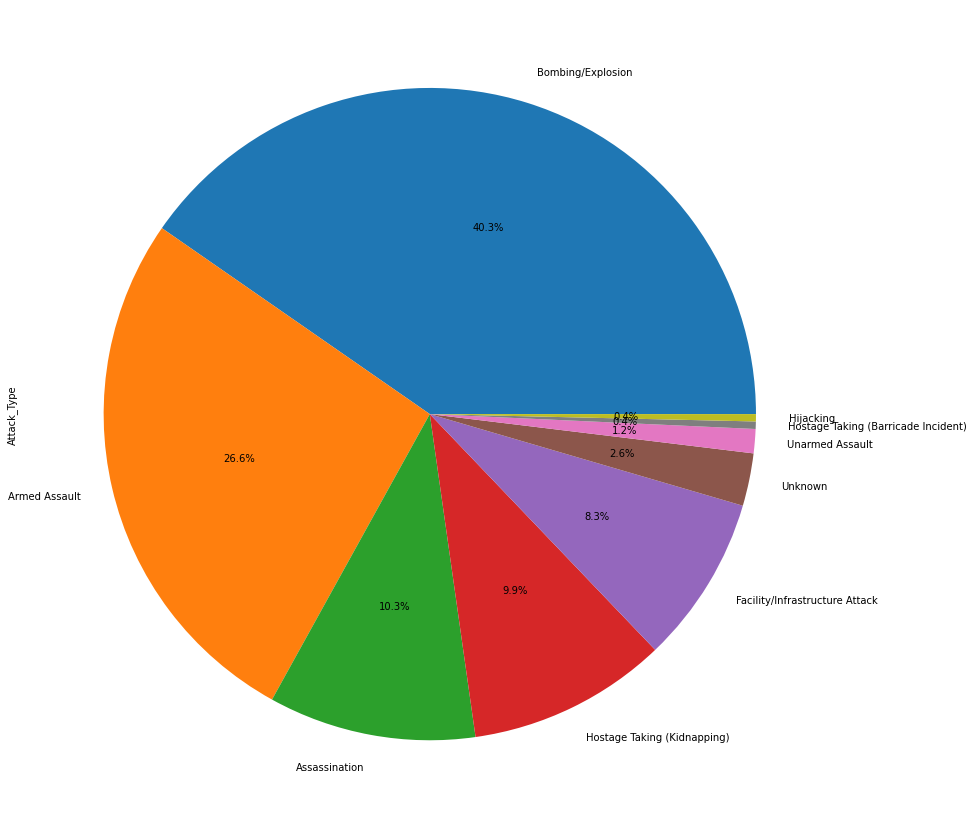

In [87]:
# visulaization percentile expression of most choosed attack types 

plt.figure(figsize=(15,15))
df_India['Attack_Type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Two major attack type in India that is 40.3% attack happened by "Bombing/Explotion" and, 26.6% attack happened by "Armed Assualt". </h2>

</body>
</html>

# Percentage of target types

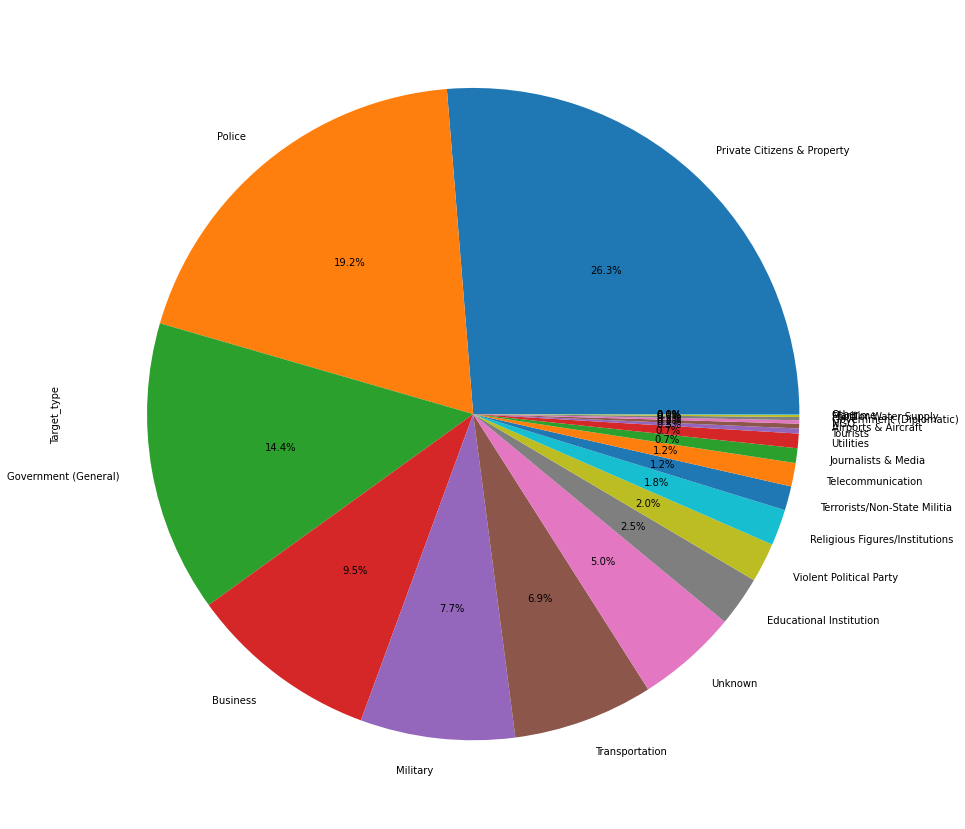

In [88]:
# visulaization percentile expression of most choosed target types

plt.figure(figsize=(15,15))
df_India['Target_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

<!DOCTYPE html>
<html>
<body>

<h1><b>Conclusion :</b></h1>
<h2>Three major choosed target in India,  that is 26.3% targeted "Private Citizens & Property", 19.2% targeted "Police" and 14.4% targeted "Goverment(general)".</h2>

</body>
</html>